<div class="alert alert-info">

# Projet 3 : Analyse de données sur la santé(nutrition)

## Idée d’application
Application: mon application permet à l'utilisateur de scanner le code barre de son produit, une fois scanner, il affiche des informations sur le produits:
- sa grade nutriscore,
- les ingredients contenant le produit,
et ça ne lui convient pas, l'application lui propose un produit de subtitution( produit de meuilleur qualité). 

- Ambition : Faire cette étude sur la totalité des pays, uniquement la France et tous les pays exépté la France ou encore pour chaque pays

## Les  jeux de données

Les champs sont séparés en quatre sections :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit. 
    
### Visualisation de la dispersion des données
Repartition du pourcentage des NaN en fonction des variables.

## Suppression des variables qui ont plus de 75% de NaN. 

La fonction prends en parametre (la data et le pourcentage)
    
## Selection de 20  variables les plus pertinents pour mon application

Repérange des variables pertinentes pour les traitements
## Detection et remplacement des outliers par NaN avec deux methodes:
- methode metier
- methode interquartile
- Remplacement des outliers par NaN

## Suppression des valeurs duppliqués
   
## Nettoyage des données 

Mise en évidence des valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
Identification et quantification des éventuelles valeurs aberrantes de chaque variable.
- iterate Imputer pour les variables correlés entre elles
- Impution par KNN pour la variable calcuim
- Remplacement des NaN par 0 pour le sel, le sucre et la fibre
- Suppression des NaN des variables categorielles


Le calcul du score nutritionnel est basé sur les données de la déclaration nutritionnelle, pour 100g de produit
Le calcul du score global d’un aliment se fait en retranchant la somme des points favorables à la somme des points défavorables.
</div> 

In [ ]:
https://world.openfoodfacts.org/

In [1]:
pip install plotly.express 

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/mel/anaconda3/lib/python3.7/site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pandas

    100% |████████████████████████████████| 4.7MB 14.4MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Stored in directory: /home/mel/.cache/pip/wheels/5c/f4/45/389dc711f0c5ff9adeb5245397ab18bf75182e8cff9fbfa916
Successfully built pandas
  Found existing installation: pandas 1.2.3
    Uninstalling pandas-1.2.3:
      Successfully uninstalled pandas-1.2.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade numexpr

    100% |████████████████████████████████| 102kB 2.0MB/s a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Stored in directory: /home/mel/.cache/pip/wheels/7b/b6/73/d725e3f30cb5cb3885e0092da450317ee2455a02cf16a475df
Successfully built numexpr
  Found existing installation: numexpr 2.6.9
    Uninstalling numexpr-2.6.9:
      Successfully uninstalled numexpr-2.6.9
Note: you may need to restart the kernel to use updated packages.


### Importation des packages 

In [1]:
# Importation des packages pandas, seborn, matplotlib, 
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

<div class="alert alert-success">
<strong>Fonctions utilisées ci-dessous  :  </strong>
<ul>
<li><strong>formats(dataframe) : </strong>Format de la dataset : lignes/colonnes</li>
<li><strong>colunmLigneDuplicated(dataframe) : </strong>Lignes et colonnes dupliquées</li>
<li><strong>data_nan(dataframe) : </strong>Nombre de NaN présents dans la dataset et leur pourcentage</li>
<li><strong>data_count_percent(dataframe) : </strong>Nombre de NaN et leur pourcentage pour chaque colonne</li>
<li><strong>ratio(dataframe, perc) : </strong>Suppression des variables qui ont plus de x% de NaN. La fonction prends en parametre (la data et le pourcentage)</li>
<li><strong>data_count_percent(dataframe) : </strong>Calcule le nombre de NaN et leur pourcentage</li>
    
<li><strong>detect_outlier(dataframe, colonnes) : </strong>Detecte le nombre de valeurs aberrantes par la methode metier</li>    
    
<li><strong>suppre_outlier(dataframe, colonnes) : </strong>Remplace des outliers detecter par la methode metier par des NaN</li>

<li><strong>detect_outlier_interq(dataframe, colonnes) : </strong>Detecter le nombre de outlier</li>
<li><strong>delete_outlier_quartile(dataframe,colonnes) : </strong>Remplace des outlier par NaN par la methode interquartile</li>
<li><strong>calculModalites(df, column) : </strong>Permet de calculer le nbre de modalité pour chaque colonne</li>
</ul>
</div>

In [2]:
def formats(dataframe, name):
    formats = pd.DataFrame([dataframe.shape],
                       columns=['Nbre de lignes','Nbre de colonnes'],
                       index=[name])
    return formats

In [3]:
def colunmLigneDuplicated(dataframe):
    a = dataframe.columns.duplicated().sum()
    b = dataframe.duplicated().sum()
    duplicated = pd.DataFrame([(str(a),str(b))],
                       columns=['Colonnes dupliquées','Lignes dupliquées'],
                       index=['Données Food Facts'])
    return duplicated

In [4]:
def data_nan(dataframe):
    a = dataframe.isna().sum().sum()
    b = dataframe.isna().sum().sum()/(dataframe.shape[0] * dataframe.shape[1])
    nan = pd.DataFrame([(str(a),str(b)[:4])],
                       columns=['Nbre de valeurs manquantes','Valeurs manquantes en %'],
                       index=['Données Food Facts'])
    return nan

In [5]:
def data_count_percent_nan(dataframe, name):
        data_count_percent = pd.DataFrame({
            'count_'+ name : dataframe.isna().sum(),
            'percent_'+ name : 100 * dataframe.isna().sum() / dataframe.shape[0]})
        
        return data_count_percent.sort_values(by = 'count_'+ name)

In [6]:
def data_count_percent(dataframe, nutriments_labels):
    for col in nutriments_labels:
        data_count_percent = pd.DataFrame({
            'count': dataframe.isna().sum(),
            'percent': 100 * dataframe.isna().sum() / dataframe.shape[0]})
        # Transposition de la data
        
    return data_count_percent.sort_values(by = 'percent')

In [7]:
def data_count_percent_col(dataframe, nutriments_labels):
    for col in nutriments_labels:
        data_count_percent = pd.DataFrame({
            'count': dataframe[col].isna().sum(),
            'percent': 100 * dataframe[col].isna().sum() / dataframe.shape[0]})
        # Transposition de la data
        
    return data_count_percent.sort_values(by = 'percent')

In [8]:
def ratio(dataframe, perc):
    data_foodfacts_clean = dataframe[dataframe.columns[(dataframe.isna().sum()/dataframe.shape[0]) < perc]]
    return data_foodfacts_clean

In [9]:
def ratio_inf_supp(dataframe, perc_inf, perc_sup):
    data_foodfacts_clean = dataframe[[dataframe.columns[(dataframe.isna().sum()/dataframe.shape[0]) < perc_sup]] and [dataframe.columns[(dataframe.isna().sum()/dataframe.shape[0]) < perc_inf]]]
    return data_foodfacts_clean

In [1]:
def detect_outliers(dataframe, colonnes):
    
    for col in colonnes:
        # je calcule les valeurs abberantes avec la limite max = 100 et min = 0 pour tout les nuttriment sauf energy
        nombre_aberrantes_sauf_energie = (dataframe[colonnes].drop(columns='energy_100g')>100).sum() + (dataframe[colonnes].drop(columns='energy_100g')<0).sum()
        #L'energie n'a pas la même limite que les autres, le max = 3700g et le min = 0
        nombre_aberrantes_sauf_energie['energy_100g']= (dataframe['energy_100g']<0).sum() + (dataframe['energy_100g'] >3700).sum()
        
    return nombre_aberrantes_sauf_energie

In [2]:
#Remplacement les outliers detectés par NaN : la methode metier
def replace_outliers_per_nan(dataframe, colonnes):
    for col in colonnes:
        if 'energy' not in col:
            dataframe.loc[dataframe[col] < 0] = np.nan
            dataframe.loc[dataframe[col] > 100] = np.nan
        
        else:
        
            dataframe.loc[dataframe[col] < 0] = np.nan
            dataframe.loc[dataframe[col] > 3700] = np.nan
    
    return dataframe

In [12]:
def detect_outliers_interq(dataframe, colonnes):
    
    for col in colonnes:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3-Q1
        Limite_inf = Q1 - (1.5 * IQR)
        Limite_sup = Q3 + (1.5 * IQR)
        nombre_aberrantes = (dataframe[colonnes]< Limite_inf).sum() + (dataframe[colonnes]> Limite_sup).sum()
        
    return nombre_aberrantes

In [13]:
#Remplacement des outlier par NaN par la methode interquartile
def replace_outliers_per_na_quartile(dataframe,colonnes):

    for col in colonnes:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3-Q1
        Limite_inf = Q1 - (1.5 * IQR)
        Limite_sup = Q3 + (1.5 * IQR)
        dataframe.loc[dataframe[col] < Limite_inf] = np.nan
        dataframe.loc[dataframe[col] > Limite_sup] = np.nan
        

    return(dataframe)

In [14]:
def calculModalites(df, column):
    mods = pd.DataFrame(df[df[column].notnull()][column].value_counts(normalize=False))
    modalites = pd.DataFrame(mods.values, index=mods.index, columns=['Nbre Modalité']).sort_index()
    modalites.index.names = ['Modalités']
    return modalites

In [15]:
def df_object_float(df):
    df_object = pd.DataFrame()
    df_float = pd.DataFrame()
    for col in df.columns:
        if df[col].dtypes == 'object':
            df_object[col] = df[col]
        else:
            df_float[col] = df[col]
            
    return df_object, df_float

In [16]:
def df_object_float_with_index(df):
    df_object = pd.DataFrame()
    df_float = pd.DataFrame()
    for col in df.columns:
        if df[col].dtypes == 'object':
            df_object[col] = df[col]
        else:
            df_float[col] = df[col]
    #df_object.set_index('code')
    #df_float.set_index(df['code'])        
    return df_object, df_float

### Importation du dataset

In [17]:
data_foodfacts = pd.read_csv('data/openfoodfacts.csv' , sep='\t', on_bad_lines='skip', low_memory=False)

### Description du dataset

###### Format

In [18]:
formats(data_foodfacts, 'Données Food Facts')

Nbre de lignes  Nbre de colonnes
Données Food Facts          320772               162

###### On a une population de 320772 individus et 162 paramétres

###### Informations sur le dataset

In [19]:
data_foodfacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Nos données sont constituées de 106 paramétres de type float et 56 paramétres de type objet

In [20]:
#Types de données
data_foodfacts.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [21]:
#Noms de colonnes
data_foodfacts.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

Aperçu global de données : affichage des 5 premiers et 5 derniers lignes, et les 10 premieres et dérniéres colonnes

In [22]:
data_foodfacts

code                                                url  \
0       0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1       0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2       0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3       0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4       0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
0           1474103893   2016-09-17T09:18:13Z   
1           1489069957   2017-03-09T14:32:37Z   
2           1489069957   2017-03-09T14:32:37Z   
3           1489055731   2017-03-09T10:35:31Z   
4           1489055653   2017-03-09T10:34:13Z   
...                ...                    ...   
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ... ph_100g  \
0                                   NaN      1kg  ...     NaN   
1                                   NaN      NaN  ...     NaN   
2                                   NaN      NaN  ...     NaN   
3                                   NaN      NaN  ...     NaN   
4                                   NaN      NaN  ...     NaN   
...                                 ...      ...  ...     ...   
320767                              NaN        1  ...     NaN   
320768                              NaN      NaN  ...     NaN   
320769  Leba pickle flavor potato chips     50 g  ...     NaN   
320770                              NaN      67g  ...     NaN   
320771                              NaN      NaN  ...     NaN   

       fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g  \
0                              NaN                              N

###### Statistiques descriptives : résument la tendance centrale, la dispersion et la forme de nos variables numériques

In [23]:
data_foodfacts.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

On observe des variables qui ne contiennent aucune information: no_nutriments, ingredients_from_palm_oil ...., détectons les afin de les supprimer. on constate aussi qu'il y'a des Valeurs manquantes : (320772 - 248939 = 71833) dans les parémetres ci-dessus ou 320723 Nan dans ph_100g. 

Détection et suppression des paramétres complétement vides

In [18]:
# Détéctions des paramétres complétement vides
columns = data_foodfacts.columns
columns_vides = []
for col in columns:
    if data_foodfacts[col].count() == 0:
        columns_vides.append(col)
columns_vides

['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

In [25]:
data_foodfacts[['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']].dtypes

no_nutriments                            float64
ingredients_from_palm_oil                float64
ingredients_that_may_be_from_palm_oil    float64
nutrition_grade_uk                       float64
butyric-acid_100g                        float64
caproic-acid_100g                        float64
lignoceric-acid_100g                     float64
cerotic-acid_100g                        float64
melissic-acid_100g                       float64
elaidic-acid_100g                        float64
mead-acid_100g                           float64
erucic-acid_100g                         float64
nervonic-acid_100g                       float64
chlorophyl_100g                          float64
glycemic-index_100g                      float64
water-hardness_100g                      float64
dtype: object

In [26]:
data_foodfacts[['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']]

no_nutriments  ingredients_from_palm_oil  \
0                 NaN                        NaN   
1                 NaN                        NaN   
2                 NaN                        NaN   
3                 NaN                        NaN   
4                 NaN                        NaN   
...               ...                        ...   
320767            NaN                        NaN   
320768            NaN                        NaN   
320769            NaN                        NaN   
320770            NaN                        NaN   
320771            NaN                        NaN   

        ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
0                                         NaN                 NaN   
1                                         NaN                 NaN   
2                                         NaN                 NaN   
3                                         NaN                 NaN   
4                                         NaN                 NaN   
...                                       ...                 ...   
320767                                    NaN                 NaN   
320768                                    NaN                 NaN   
320769                                    NaN                 NaN   
320770                                    NaN                 NaN   
320771                                    NaN                 NaN   

        butyric-acid_100g  caproic-acid_100g  lignoceric-acid_100g  \
0                     NaN                NaN                   NaN   
1                     NaN                NaN                   NaN   
2                     NaN                NaN                   NaN   
3                     NaN                NaN                   NaN   
4                     NaN                NaN                   NaN   
...                   ...                ...                   ...   
320767                NaN                NaN                   NaN   
320768                NaN                NaN                   NaN   
320769                NaN                NaN                   NaN   
320770                NaN                NaN                   NaN   
320771                NaN                NaN                   NaN   

        cerotic-acid_100g  melissic-acid_100g  elaidic-acid_100g  \
0                     NaN                 NaN                NaN   
1                     NaN                 NaN                NaN   
2                     NaN                 NaN                NaN   
3                     NaN                 NaN                NaN   
4                     NaN                 NaN                NaN   
...                   ...                 ...                ...   
320767                NaN                 NaN                NaN   
320768                NaN                 NaN                NaN   
320769                NaN                 NaN                NaN   
320770                NaN                 NaN                NaN   
320771                NaN                 NaN                NaN   

        mead-acid_100g  erucic-acid_100g  nervonic-acid_100g  chlorophyl_100g  \
0                  NaN               NaN                 NaN              NaN   
1                  NaN               NaN                 NaN              NaN   
2                  NaN               NaN                 NaN              NaN   
3                  NaN               NaN                 NaN              NaN   
4                  NaN               NaN                 NaN              NaN   
...                ...               ...                 ...              ...   
320767             NaN               NaN                 NaN              NaN   
320768             NaN               NaN                 NaN              NaN   
320769             NaN               NaN                 NaN              NaN   
320770             NaN               NaN                 NaN              NaN   
32077

On a 16 paramétres de types float complétement vides que l'on va supprimer

In [19]:
# Sppréssion des params vides
data_foodfacts_ = data_foodfacts.drop(columns_vides, axis=1)

In [20]:
# Nouveau formats
formats(data_foodfacts_,'Données Food Facts')

Nbre de lignes  Nbre de colonnes
Données Food Facts          320772               146

On passe de 162 à 146 variables

##### Détections des colonnes ou lignes dupliquées

In [29]:
colunmLigneDuplicated(data_foodfacts_)

Colonnes dupliquées Lignes dupliquées
Données Food Facts                   0                 0

Il n'y a ni colonnes ni lignes dupliquées

In [30]:
data_foodfacts_.describe()

additives_n  ingredients_from_palm_oil_n  \
count  248939.000000                248939.000000   
mean        1.936024                     0.019659   
std         2.502019                     0.140524   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g  \
count                            248939.000000  2.611130e+05   
mean                                  0.055246  1.141915e+03   
std                                   0.269207  6.447154e+03   
min                                   0.000000  0.000000e+00   
25%                                   0.000000  3.770000e+02   
50%                                   0.000000  1.100000e+03   
75%                                   0.000000  1.674000e+03   
max                                   6.000000  3.251373e+06   

       energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count            857.000000  243891.000000       229554.000000   
mean             585.501214      12.730379            5.129932   
std              712.809943      17.578747            8.014238   
min                0.000000       0.000000            0.000000   
25%               49.400000       0.000000            0.000000   
50%              300.000000       5.000000            1.790000   
75%              898.000000      20.000000            7.140000   
max             3830.000000     714.290000          550.000000   

       caprylic-acid_100g  capric-acid_100g  lauric-acid_100g  ...  \
count                 1.0          2.000000          4.000000  ...   
mean                  7.4          6.040000         36.136182  ...   
std                   NaN          0.226274         24.101433  ...   
min                   7.4          5.880000          0.044730  ...   
25%                   7.4          5.960000         34.661183  ...   
50%                   7.4          6.040000         47.600000  ...   
75%                   7.4          6.120000         49.075000  ...   
max                   7.4          6.200000         49.300000  ...   

       iodine_100g  caffeine_100g  taurine_100g    ph_100g  \
count   259.000000      78.000000     29.000000  49.000000   
mean      0.000427       1.594563      0.145762   6.425698   
std       0.001285       6.475588      0.172312   2.047841   
min       0.000000       0.000000      0.001800   0.000000   
25%       0.000015       0.015500      0.035000   6.300000   
50%       0.000034       0.021000      0.039000   7.200000   
75%       0.000103       0.043000      0.400000   7.400000   
max       0.014700      42.280000      0.423000   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  carbon-footprint_100g  nutrition-score-fr_100g  \
count  948.000000             268.000000            221210.000000   
mean    49.547785             341.700764                 9.165535   
std     18.757932             425.211439                 9.055903   
min      6.000000               0.000000               -15.000000   
25%     32.000000              98.750000                 1.000000   
50%     50.000000             195.750000                10.000000   
75%     64.250000             383.200

La mesure count nous indique qu'il y'a beaucoup de NaN dans les variables numeriques

### I : Traitement des valeurs manquantes(les NaN)

In [31]:
# Valeurs manquantes dans le dataset global ainsi leur pourcentage aprés suppression des variables vides
data_nan(data_foodfacts_)

Nbre de valeurs manquantes Valeurs manquantes en %
Données Food Facts                   34476237                    0.73

Nous constatons qu'il y'a 3 447 6237 valeurs manquantes dans le dataset, ce qui correspond à plus de 0.73%

In [32]:
# Valeurs manquantes par variables ainsi leurs pourcentages
data_count_percent_nan(data_foodfacts_,'NaN')

count_NaN  percent_NaN
last_modified_t                 0     0.000000
last_modified_datetime          0     0.000000
creator                         2     0.000623
created_t                       3     0.000935
created_datetime                9     0.002806
...                           ...          ...
palmitic-acid_100g         320771    99.999688
myristic-acid_100g         320771    99.999688
caprylic-acid_100g         320771    99.999688
stearic-acid_100g          320771    99.999688
montanic-acid_100g         320771    99.999688

[146 rows x 2 columns]

On remarque que certaines variables sont quasiment vide (contiennennet plus de 99.99% de NaN) ex: 'almitic-acid_100g' , 'myristic-acid_100g'

code : code-barres du produit (peut être EAN-13 ou des codes internes pour certains magasins d'alimentation), pour les produits sans code-barres, Open Food Facts attribue un numéro commençant par le préfixe réservé 200

La variable "code" nous servira de code barre afin de qualifier un produit selon sa contenance de différents nutriments, on en supprime ceux dont la valeur est non remplie(il en a 23).

In [33]:
data_foodfacts_['code'].isna().sum()

23

In [21]:
code = data_foodfacts_[data_foodfacts_['code'].duplicated()]['code'].values
code


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [22]:
data_foodfacts_ = data_foodfacts_.dropna(subset = ['code'])

Séléctions données France et données autres pays

In [22]:
# Produits concernant uniquement la France
data_foodfacts_fr = data_foodfacts_[data_foodfacts_['countries_fr'] == 'France']

In [23]:
# Produits concernant les autres pays excépté la france
data_foodfacts_others = data_foodfacts_[data_foodfacts_['countries_fr'] != 'France']

In [24]:
formats(data_foodfacts_, 'Données globales')

Nbre de lignes  Nbre de colonnes
Données globales          320772               146

In [39]:
formats(data_foodfacts_fr, 'Données France')

Nbre de lignes  Nbre de colonnes
Données France           94392               146

In [40]:
formats(data_foodfacts_others, 'Données autres pays')

Nbre de lignes  Nbre de colonnes
Données autres pays          226357               146

In [41]:
94392 + 226357

320749

###### I-1 :Visualisation des NaN dans nos jeux de données : global, others et France

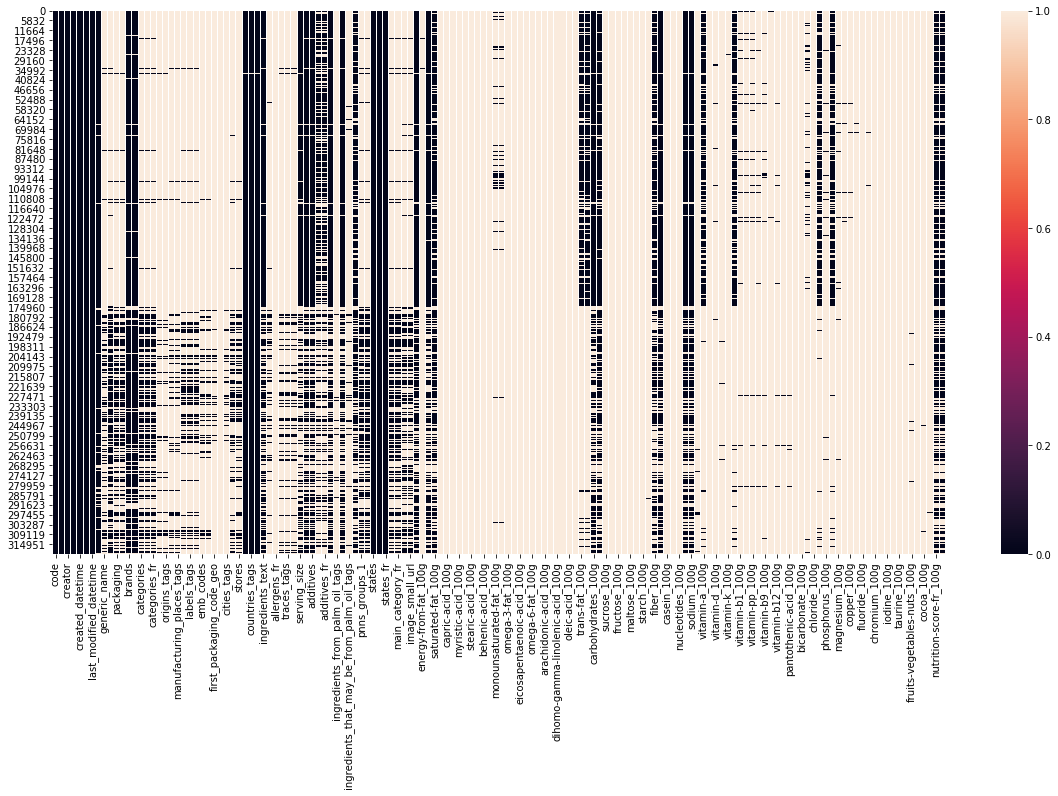

In [31]:
# Visualisation de la dispersion des NaN dans le jeu de données global
plt.figure(figsize=(20,10))
sns.heatmap(data_foodfacts_.isna(), cbar=True)

On constate visuellement qu'il y'a énormement de NaN dans notre jeu de données

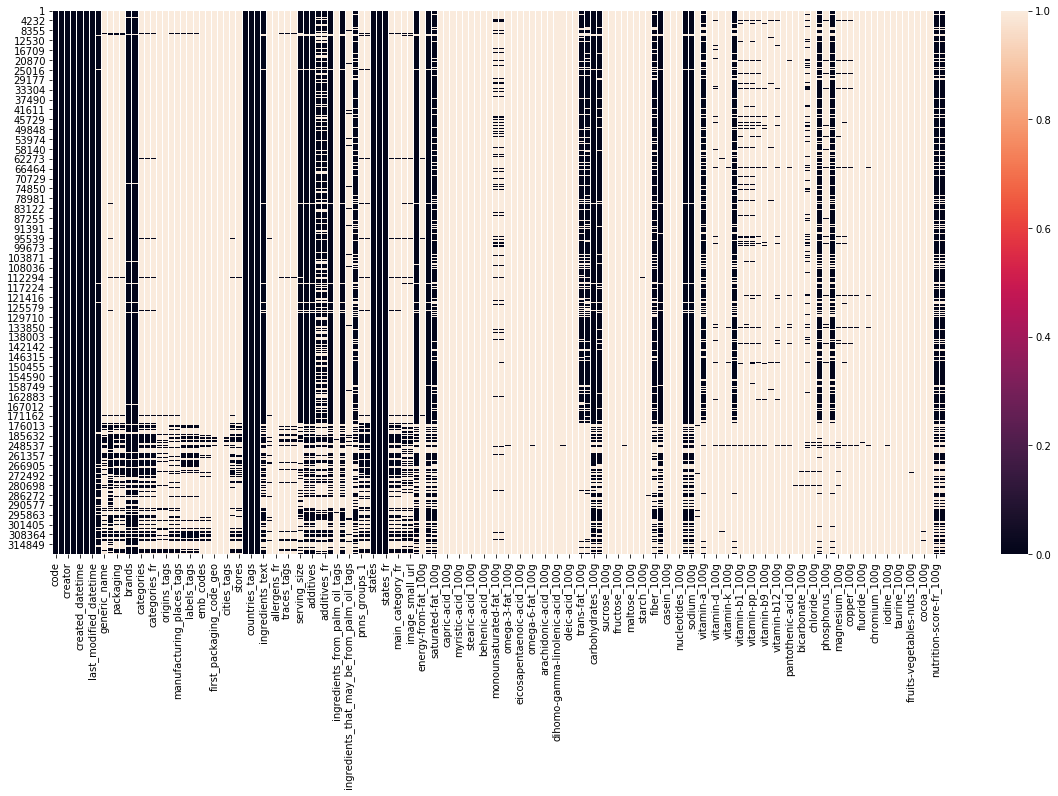

In [20]:
# Visualisation de la dispersion des NaN dans le jeu de données : data_foodfacts_others
plt.figure(figsize=(20,10))
sns.heatmap(data_foodfacts_others.isna(), cbar=True)

ressemble au graphique ci-dessus

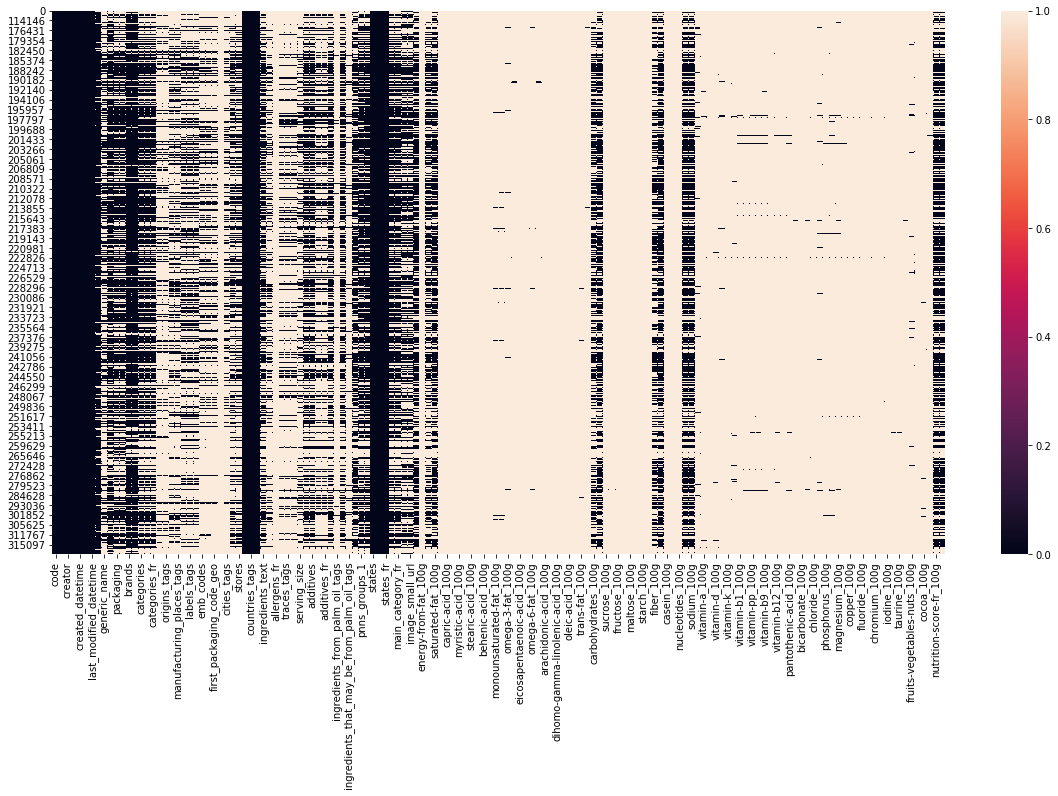

In [21]:
# Visualisation de la dispersion des NaN dans le jeu de données France
plt.figure(figsize=(20,10))
sns.heatmap(data_foodfacts_fr.isna(), cbar=True)

On constate qu-il y'a légérement monis de valeurs manquantes que le premier graphe mais reste élévé

###### I-2 : On applique la fonction ratio décrite ci-dessus pour supprimer les variables qui ont plus de 75% de NaN

In [25]:
# Suppression des variables ayant moins de 75% de NaN
data_foodfacts_cleaned_75 = ratio(data_foodfacts_, 0.75)

In [26]:
# Suppression des variables(autres pays que la France) ayant moins de 75% de NaN
data_foodfacts_others_cleaned_75 = ratio(data_foodfacts_others, 0.75)

In [27]:
# Suppression des variables concernant la France ayant moins de 75% de NaN
data_foodfacts_fr_cleaned_75 = ratio(data_foodfacts_fr, 0.75)

In [28]:
formats(data_foodfacts_cleaned_75, 'data food global')

Nbre de lignes  Nbre de colonnes
data food global          320772                50

In [30]:
formats(data_foodfacts_others_cleaned_75, 'data food others')

Nbre de lignes  Nbre de colonnes
data food others          226357                42

In [31]:
formats(data_foodfacts_fr_cleaned_75, 'data food France')

Nbre de lignes  Nbre de colonnes
data food France           94392                56

In [32]:
data_foodfacts_fr_cleaned_75['code'].isna().sum()

0

In [53]:
94392+226357

320749

##### Enregistrement I : Données dont les NaN sont inférieures à 75% 

In [42]:
#Données globales NaN < 75%
data_foodfacts_cleaned_75.to_csv( 'data/data_foodfacts_cleaned_75.csv')
#Données autres pays NaN < 75%
data_foodfacts_others_cleaned_75.to_csv( 'data/data_foodfacts_others_cleaned_75.csv')
#Données France NaN < 75%
data_foodfacts_fr_cleaned_75.to_csv( 'data/data_foodfacts_fr_cleaned_75.csv')

In [44]:
data_foodfacts_cleaned_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320749 entries, 0 to 320771
Data columns (total 50 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320747 non-null  object 
 3   created_t                                320749 non-null  object 
 4   created_datetime                         320748 non-null  object 
 5   last_modified_t                          320749 non-null  object 
 6   last_modified_datetime                   320749 non-null  object 
 7   product_name                             302987 non-null  object 
 8   quantity                                 104800 non-null  object 
 9   brands                                   292360 non-null  object 
 10  brands_tags                     

In [50]:
data_foodfacts_others_cleaned_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226357 entries, 1 to 320771
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     226357 non-null  object 
 1   url                                      226357 non-null  object 
 2   creator                                  226355 non-null  object 
 3   created_t                                226357 non-null  object 
 4   created_datetime                         226356 non-null  object 
 5   last_modified_t                          226357 non-null  object 
 6   last_modified_datetime                   226357 non-null  object 
 7   product_name                             215589 non-null  object 
 8   brands                                   209830 non-null  object 
 9   brands_tags                              209826 non-null  object 
 10  countries                       

In [55]:
data_foodfacts_fr_cleaned_75.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94392 entries, 0 to 320770
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     94392 non-null  object 
 1   url                                      94392 non-null  object 
 2   creator                                  94392 non-null  object 
 3   created_t                                94392 non-null  object 
 4   created_datetime                         94392 non-null  object 
 5   last_modified_t                          94392 non-null  object 
 6   last_modified_datetime                   94392 non-null  object 
 7   product_name                             87398 non-null  object 
 8   generic_name                             35951 non-null  object 
 9   quantity                                 67730 non-null  object 
 10  packaging                                5591

#### Résumé : 
- Données globales ---> dtypes: float64(20), object(30)
- Données autres pays ---> dtypes: float64(20), object(22)
- Données France ---> dtypes: float64(14), object(42)
###### On remarque qu'il y'a plus de variables dans le jeu France mais moins de variables numérique

###### I-3 : Données manquantes aprés nettoyage et leur visualisation

In [48]:
data_count_percent_nan(data_foodfacts_fr_cleaned_75,'fr')

count_fr  percent_fr
code                                            0    0.000000
states_fr                                       0    0.000000
countries_tags                                  0    0.000000
countries_fr                                    0    0.000000
states                                          0    0.000000
states_tags                                     0    0.000000
countries                                       0    0.000000
url                                             0    0.000000
creator                                         0    0.000000
created_t                                       0    0.000000
created_datetime                                0    0.000000
last_modified_t                                 0    0.000000
last_modified_datetime                          0    0.000000
product_name                                 6994    7.409526
brands                                      11862   12.566743
brands_tags                                 11866   12.570981
quantity                                    26662   28.246038
pnns_groups_2                               30756   32.583270
pnns_groups_1                               32757   34.703153
energy_100g                                 32958   34.916095
proteins_100g                               33208   35.180948
salt_100g                                   34848   36.918383
sodium_100g                                 34851   36.921561
sugars_100g                                 34904   36.977710
saturated-fat_100g                          35002   37.081532
categories_tags                             35640   37.757437
main_category_fr                            35640   37.757437
categories_fr                               35640   37.757437
categories                                  35640   37.757437
main_category                               35640   37.757437
nutrition_grade_fr                          35891   38.023349
nutrition-score-uk_100g                     35891   38.023349
nutrition-score-fr_100g                     35891   38.023349
packaging                                   38482   40.768285
packaging_tags                              38482   40.768285
ingredients_text                            43900   46.508179
ingredients_from_palm_oil_n                 43900   46.508179
ingredients_that_may_be_from_palm_oil_n     43900   46.508179
additives_n                                 43900   46.508179
additives                                   43912   46.520892
image_small_url                             44941   47.611026
image_url                                   44941   47.611026
fat_100g                                    49801   52.759768
carbohydrates_100g                          50213   53.196245
fiber_100g                                  50746   53.760912
purchase_places                             53409   56.582126
stores                                      58438   61.909908
generic_name                                58441   61.913086
labels_tags                                 60894   64.511823
labels_fr                                   60894   64.511823
labels                                      60932   64.552081
additives_tags                              65734   69.639376
additives_fr                                65734   69.639376
manufacturing_places                        69836   73.985083
manufacturing_places_tags                   69839   73.988262
serving_size                                70121   74.287016

In [49]:
pd.concat([data_count_percent_nan(data_foodfacts_cleaned_75,'global'), data_count_percent_nan(data_foodfacts_others_cleaned_75,'others'), data_count_percent_nan(data_foodfacts_fr_cleaned_75,'fr')], axis=1)

count_global  percent_global  count_others  \
code                                0.0             0.0           0.0   
url                                 0.0             0.0           0.0   
created_t                           0.0             0.0           0.0   
last_modified_t                     0.0             0.0           0.0   
last_modified_datetime              0.0             0.0           0.0   
...                                 ...             ...           ...   
labels_tags                         NaN             NaN           NaN   
labels_fr                           NaN             NaN           NaN   
labels                              NaN             NaN           NaN   
manufacturing_places                NaN             NaN           NaN   
manufacturing_places_tags           NaN             NaN           NaN   

                           percent_others  count_fr  percent_fr  
code                                  0.0       0.0    0.000000  
url                                   0.0       0.0    0.000000  
created_t                             0.0       0.0    0.000000  
last_modified_t                       0.0       0.0    0.000000  
last_modified_datetime                0.0       0.0    0.000000  
...                                   ...       ...         ...  
labels_tags                           NaN   60894.0   64.511823  
labels_fr                             NaN   60894.0   64.511823  
labels                                NaN   60932.0   64.552081  
manufacturing_places                  NaN   69836.0   73.985083  
manufacturing_places_tags             NaN   69839.0   73.988262  

[62 rows x 6 columns]

On remarque que : count_global = count_others + count_fr. Certaines variables dans les données France comportent plus de 50% de NaN.

Revisualisation aprés nettoyage des NaN (<0.75%)

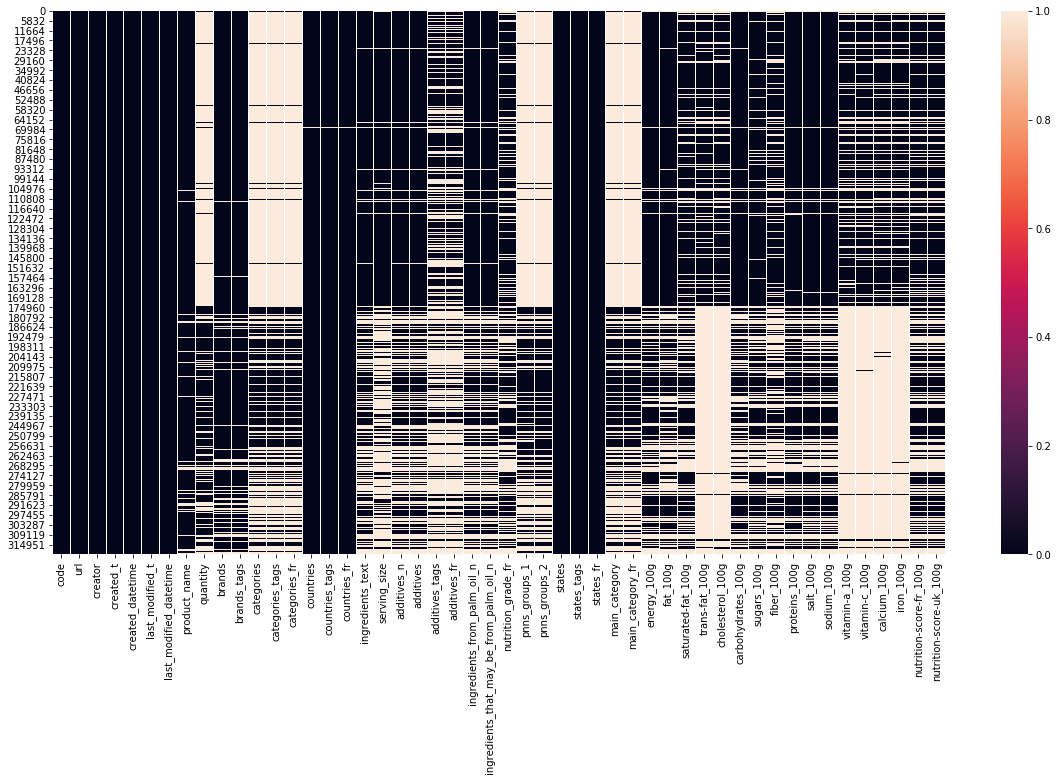

In [59]:
# Visualisation de la dispersion des NaN dans le jeu de données global
plt.figure(figsize=(20,10))
sns.heatmap(data_foodfacts_cleaned_75.isna(), cbar=True)

On constate qu'à présent, on a beaucoup mois de variables contenant des NaN.

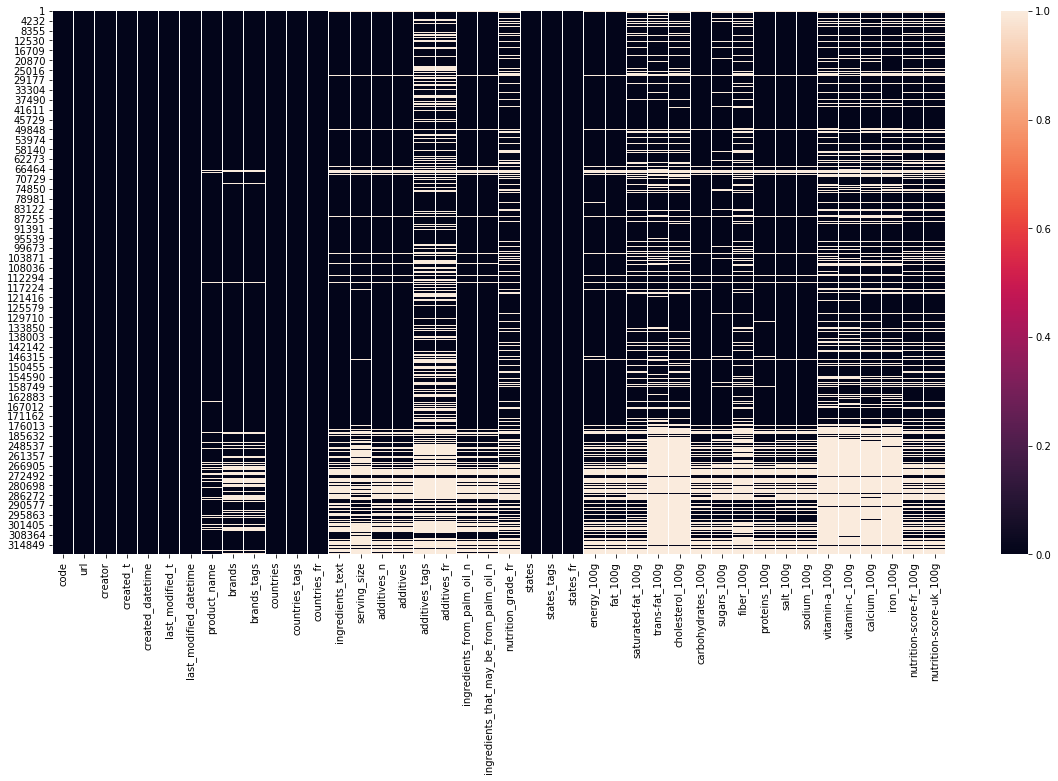

In [60]:
# Revisualisation de la dispersion des NaN dans le jeu de données : data_foodfacts_others
plt.figure(figsize=(20,10))
sns.heatmap(data_foodfacts_others_cleaned_75.isna(), cbar=True)

On constate moins de NaN dans nos variables

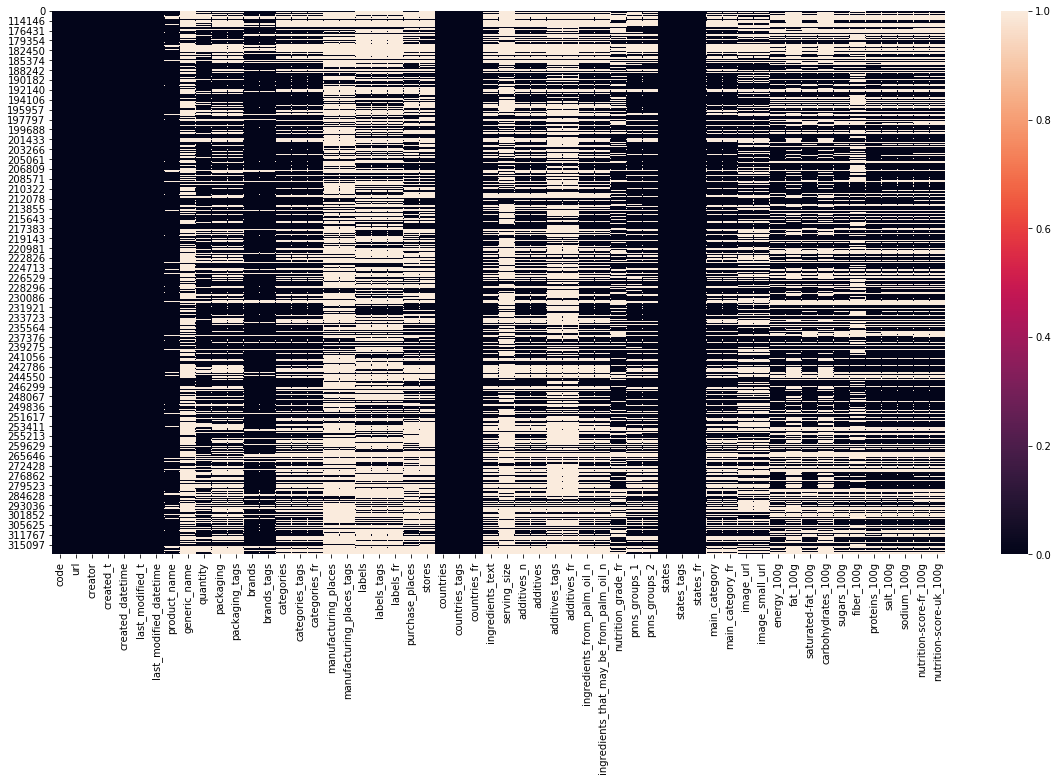

In [23]:
# Revisualisation de la dispersion des NaN dans le jeu de données France
plt.figure(figsize=(20,10))
sns.heatmap(data_foodfacts_fr_cleaned_75.isna(), cbar=True)

Encore moins des NaN dans le jeu de données France

Pour ce qui suit, nous travaillons uniquement sur le jeu de données France, car l'étude est destinée au consomateurs français

Séparons dans un premier temps nos données en deux dataFrames : une pour les variables type float et l'autre pour les variables de type objet

Tout d'abord, indexons nous données avec la variable 'code'

In [29]:
data_foodfacts_fr_cleaned_75.set_index('code', inplace=True)
data_foodfacts_fr_cleaned_75

url  \
code                                                               
0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
0000000024600  http://world-fr.openfoodfacts.org/produit/0000...   
0000000027205  http://world-fr.openfoodfacts.org/produit/0000...   
0000000039259  http://world-fr.openfoodfacts.org/produit/0000...   
0000005200016  http://world-fr.openfoodfacts.org/produit/0000...   
...                                                          ...   
9906410000009  http://world-fr.openfoodfacts.org/produit/9906...   
99111250       http://world-fr.openfoodfacts.org/produit/9911...   
9918           http://world-fr.openfoodfacts.org/produit/9918...   
9935010000003  http://world-fr.openfoodfacts.org/produit/9935...   
9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   

                                  creator   created_t      created_datetime  \
code                                                                          
0000000003087  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
0000000024600             date-limite-app  1434530704  2015-06-17T08:45:04Z   
0000000027205                     tacinte  1458238630  2016-03-17T18:17:10Z   
0000000039259                     tacinte  1422221773  2015-01-25T21:36:13Z   
0000005200016                     sigoise  1441186657  2015-09-02T09:37:37Z   
...                                   ...         ...                   ...   
9906410000009                  agamitsudo  1373480408  2013-07-10T18:20:08Z   
99111250                         balooval  1367163039  2013-04-28T15:30:39Z   
9918                           woshilapin  1430167954  2015-04-27T20:52:34Z   
9935010000003                    sebleouf  1446293229  2015-10-31T12:07:09Z   
9980282863788  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   

              last_modified_t last_modified_datetime  \
code                                                   
0000000003087      1474103893   2016-09-17T09:18:13Z   
0000000024600      1434535914   2015-06-17T10:11:54Z   
0000000027205      1458238638   2016-03-17T18:17:18Z   
0000000039259      1473538082   2016-09-10T20:08:02Z   
0000005200016      1442570752   2015-09-18T10:05:52Z   
...                       ...                    ...   
9906410000009      1451851215   2016-01-03T20:00:15Z   
99111250           1371690556   2013-06-20T01:09:16Z   
9918               1430167992   2015-04-27T20:53:12Z   
9935010000003      1446376839   2015-11-01T11:20:39Z   
9980282863788      1492340089   2017-04-16T10:54:49Z   

                             product_name         generic_name quantity  \
code                                                                      
0000000003087          Farine de blé noir                  NaN      1kg   
0000000024600               Filet de bœuf                  NaN  2.46 kg   
0000000027205                         NaN                  NaN      NaN   
0000000039259                     Twix x2                  NaN      NaN   
0000005200016           lentilles vertes                   NaN    1 kg    
...                                   ...                  ...      ...   
9906410000009   Roussette du Bugey (2011)  Vins blanc du Bugey   750 ml   
99111250               Thé vert Earl grey    thé bio équitable     50 g   
9918           Cheese cake thé vert, yuzu                  NaN      NaN   
9935010000003              Rillette d'oie                  NaN    180 g   
9980282863788    Tomates aux Vermicelles                   NaN      67g   

                        packaging  ... fat_100g saturated-fat_100g  \
code                               ...                               
0000000003087                 NaN  ...      NaN                NaN   
0000000024600           plastique  ...      NaN                NaN   
0000000027205                 NaN  ...      NaN                NaN   
0000000039259                 NaN  ...      NaN                NaN   
0000005200016    Sachet

In [30]:
data_foodfacts_fr_cleaned_75_object, data_foodfacts_fr_cleaned_75_float = df_object_float(data_foodfacts_fr_cleaned_75)

In [35]:
data_foodfacts_fr_cleaned_75_object

url  \
code                                                               
0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
0000000024600  http://world-fr.openfoodfacts.org/produit/0000...   
0000000027205  http://world-fr.openfoodfacts.org/produit/0000...   
0000000039259  http://world-fr.openfoodfacts.org/produit/0000...   
0000005200016  http://world-fr.openfoodfacts.org/produit/0000...   
...                                                          ...   
9906410000009  http://world-fr.openfoodfacts.org/produit/9906...   
99111250       http://world-fr.openfoodfacts.org/produit/9911...   
9918           http://world-fr.openfoodfacts.org/produit/9918...   
9935010000003  http://world-fr.openfoodfacts.org/produit/9935...   
9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   

                                  creator   created_t      created_datetime  \
code                                                                          
0000000003087  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
0000000024600             date-limite-app  1434530704  2015-06-17T08:45:04Z   
0000000027205                     tacinte  1458238630  2016-03-17T18:17:10Z   
0000000039259                     tacinte  1422221773  2015-01-25T21:36:13Z   
0000005200016                     sigoise  1441186657  2015-09-02T09:37:37Z   
...                                   ...         ...                   ...   
9906410000009                  agamitsudo  1373480408  2013-07-10T18:20:08Z   
99111250                         balooval  1367163039  2013-04-28T15:30:39Z   
9918                           woshilapin  1430167954  2015-04-27T20:52:34Z   
9935010000003                    sebleouf  1446293229  2015-10-31T12:07:09Z   
9980282863788  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   

              last_modified_t last_modified_datetime  \
code                                                   
0000000003087      1474103893   2016-09-17T09:18:13Z   
0000000024600      1434535914   2015-06-17T10:11:54Z   
0000000027205      1458238638   2016-03-17T18:17:18Z   
0000000039259      1473538082   2016-09-10T20:08:02Z   
0000005200016      1442570752   2015-09-18T10:05:52Z   
...                       ...                    ...   
9906410000009      1451851215   2016-01-03T20:00:15Z   
99111250           1371690556   2013-06-20T01:09:16Z   
9918               1430167992   2015-04-27T20:53:12Z   
9935010000003      1446376839   2015-11-01T11:20:39Z   
9980282863788      1492340089   2017-04-16T10:54:49Z   

                             product_name         generic_name quantity  \
code                                                                      
0000000003087          Farine de blé noir                  NaN      1kg   
0000000024600               Filet de bœuf                  NaN  2.46 kg   
0000000027205                         NaN                  NaN      NaN   
0000000039259                     Twix x2                  NaN      NaN   
0000005200016           lentilles vertes                   NaN    1 kg    
...                                   ...                  ...      ...   
9906410000009   Roussette du Bugey (2011)  Vins blanc du Bugey   750 ml   
99111250               Thé vert Earl grey    thé bio équitable     50 g   
9918           Cheese cake thé vert, yuzu                  NaN      NaN   
9935010000003              Rillette d'oie                  NaN    180 g   
9980282863788    Tomates aux Vermicelles                   NaN      67g   

                        packaging  ... nutrition_grade_fr  \
code                               ...                      
0000000003087                 NaN  ...                NaN   
0000000024600           plastique  ...                NaN   
0000000027205                 NaN  ...                NaN   
0000000039259                 NaN  ...                NaN   
0000005200016    Sachet plastique  ...                NaN   
...             

In [31]:
data_foodfacts_fr_cleaned_75_float

additives_n  ingredients_from_palm_oil_n  \
code                                                      
0000000003087          NaN                          NaN   
0000000024600          NaN                          NaN   
0000000027205          NaN                          NaN   
0000000039259          NaN                          NaN   
0000005200016          0.0                          0.0   
...                    ...                          ...   
9906410000009          NaN                          NaN   
99111250               0.0                          0.0   
9918                   NaN                          NaN   
9935010000003          0.0                          0.0   
9980282863788          NaN                          NaN   

               ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
code                                                                            
0000000003087                                      NaN          NaN       NaN   
0000000024600                                      NaN          NaN       NaN   
0000000027205                                      NaN          NaN       NaN   
0000000039259                                      NaN          NaN       NaN   
0000005200016                                      0.0          NaN       NaN   
...                                                ...          ...       ...   
9906410000009                                      NaN          NaN       NaN   
99111250                                           0.0         21.0       0.2   
9918                                               NaN          NaN       NaN   
9935010000003                                      0.0          NaN       NaN   
9980282863788                                      NaN          NaN       NaN   

               saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                 
0000000003087                 NaN                 NaN          NaN   
0000000024600                 NaN                 NaN          NaN   
0000000027205                 NaN                 NaN          NaN   
0000000039259                 NaN                 NaN          NaN   
0000005200016                 NaN                 NaN          NaN   
...                           ...                 ...          ...   
9906410000009                 NaN                 NaN          NaN   
99111250                      0.2                 0.5          0.5   
9918                          NaN                 NaN          NaN   
9935010000003                 NaN                 NaN          NaN   
9980282863788                 NaN                 NaN          NaN   

               fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                               
0000000003087         NaN            NaN        NaN          NaN   
0000000024600         NaN            NaN        NaN          NaN   
0000000027205         NaN            NaN        NaN          NaN   
0000000039259         NaN            NaN        NaN          NaN   
0000005200016         NaN            NaN        NaN          NaN   
...                   ...            ...        ...          ...   
9906410000009         NaN            NaN        NaN          NaN   
99111250              0.2            0.5     0.0254         0.01   
9918                  NaN            NaN        NaN          NaN   
9935010000003         NaN            NaN        NaN          NaN   
9980282863788         NaN            NaN        NaN          NaN   

               nutrition-score-fr_100g  nutrition-score-uk_100g  
code                                                             
0000000003087                      NaN                      NaN  
0000000024600                      NaN                      NaN  
0000000027205                      NaN                      NaN  
0000000039259                      NaN                      NaN  
0

On observe des lignes remplies entierement des NaN : des doublons que l'on va supprimer par la suite

In [59]:
#data_foodfacts_fr_cleaned_75_float

In [53]:
formats(data_foodfacts_fr_cleaned_75_object,'Données France objets')

Nbre de lignes  Nbre de colonnes
Données France objets           94392                41

In [54]:
formats(data_foodfacts_fr_cleaned_75_float,'Données France Float')

Nbre de lignes  Nbre de colonnes
Données France Float           94392                14

Nous avons dans ce jeu de données 14 variables numérique et 41 variables de type Object

In [55]:
colunmLigneDuplicated(data_foodfacts_fr_cleaned_75_object)

Colonnes dupliquées Lignes dupliquées
Données Food Facts                   0                 0

In [56]:
colunmLigneDuplicated(data_foodfacts_fr_cleaned_75_float)

Colonnes dupliquées Lignes dupliquées
Données Food Facts                   0             37381

On remarque qu'il y'a 37381 lignes dupliquées parmis les 94392

### Début : Etude des lignes en doublons

In [39]:
data_foodfacts_fr_cleaned_75_float[data_foodfacts_fr_cleaned_75_float[data_foodfacts_fr_cleaned_75_float.duplicated()].isna()]

additives_n  ingredients_from_palm_oil_n  \
code                                                      
0000000003087          NaN                          NaN   
0000000024600          NaN                          NaN   
0000000027205          NaN                          NaN   
0000000039259          NaN                          NaN   
0000005200016          NaN                          NaN   
...                    ...                          ...   
9906410000009          NaN                          NaN   
99111250               NaN                          NaN   
9918                   NaN                          NaN   
9935010000003          NaN                          NaN   
9980282863788          NaN                          NaN   

               ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
code                                                                            
0000000003087                                      NaN          NaN       NaN   
0000000024600                                      NaN          NaN       NaN   
0000000027205                                      NaN          NaN       NaN   
0000000039259                                      NaN          NaN       NaN   
0000005200016                                      NaN          NaN       NaN   
...                                                ...          ...       ...   
9906410000009                                      NaN          NaN       NaN   
99111250                                           NaN          NaN       NaN   
9918                                               NaN          NaN       NaN   
9935010000003                                      NaN          NaN       NaN   
9980282863788                                      NaN          NaN       NaN   

               saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                 
0000000003087                 NaN                 NaN          NaN   
0000000024600                 NaN                 NaN          NaN   
0000000027205                 NaN                 NaN          NaN   
0000000039259                 NaN                 NaN          NaN   
0000005200016                 NaN                 NaN          NaN   
...                           ...                 ...          ...   
9906410000009                 NaN                 NaN          NaN   
99111250                      NaN                 NaN          NaN   
9918                          NaN                 NaN          NaN   
9935010000003                 NaN                 NaN          NaN   
9980282863788                 NaN                 NaN          NaN   

               fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                               
0000000003087         NaN            NaN        NaN          NaN   
0000000024600         NaN            NaN        NaN          NaN   
0000000027205         NaN            NaN        NaN          NaN   
0000000039259         NaN            NaN        NaN          NaN   
0000005200016         NaN            NaN        NaN          NaN   
...                   ...            ...        ...          ...   
9906410000009         NaN            NaN        NaN          NaN   
99111250              NaN            NaN        NaN          NaN   
9918                  NaN            NaN        NaN          NaN   
9935010000003         NaN            NaN        NaN          NaN   
9980282863788         NaN            NaN        NaN          NaN   

               nutrition-score-fr_100g  nutrition-score-uk_100g  
code                                                             
0000000003087                      NaN                      NaN  
0000000024600                      NaN                      NaN  
0000000027205                      NaN                      NaN  
0000000039259                      NaN                      NaN  
0

In [69]:
data_foodfacts_fr_cleaned_75_float[data_foodfacts_fr_cleaned_75_float[data_foodfacts_fr_cleaned_75_float.duplicated()].isna() == True]

additives_n  ingredients_from_palm_oil_n  \
code                                                      
0000000003087          NaN                          NaN   
0000005200016          NaN                          NaN   
0000007730009          NaN                          NaN   
0000010127735          NaN                          NaN   
0000010187319          NaN                          NaN   
...                    ...                          ...   
96103890               NaN                          NaN   
9782211109758          NaN                          NaN   
9782401029101          NaN                          NaN   
9847548283004          NaN                          NaN   
9900000000233          NaN                          NaN   

               ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
code                                                                            
0000000003087                                      NaN          NaN       NaN   
0000005200016                                      NaN          NaN       NaN   
0000007730009                                      NaN          NaN       NaN   
0000010127735                                      NaN          NaN       NaN   
0000010187319                                      NaN          NaN       NaN   
...                                                ...          ...       ...   
96103890                                           NaN          NaN       NaN   
9782211109758                                      NaN          NaN       NaN   
9782401029101                                      NaN          NaN       NaN   
9847548283004                                      NaN          NaN       NaN   
9900000000233                                      NaN          NaN       NaN   

               saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                 
0000000003087                 NaN                 NaN          NaN   
0000005200016                 NaN                 NaN          NaN   
0000007730009                 NaN                 NaN          NaN   
0000010127735                 NaN                 NaN          NaN   
0000010187319                 NaN                 NaN          NaN   
...                           ...                 ...          ...   
96103890                      NaN                 NaN          NaN   
9782211109758                 NaN                 NaN          NaN   
9782401029101                 NaN                 NaN          NaN   
9847548283004                 NaN                 NaN          NaN   
9900000000233                 NaN                 NaN          NaN   

               fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                               
0000000003087         NaN            NaN        NaN          NaN   
0000005200016         NaN            NaN        NaN          NaN   
0000007730009         NaN            NaN        NaN          NaN   
0000010127735         NaN            NaN        NaN          NaN   
0000010187319         NaN            NaN        NaN          NaN   
...                   ...            ...        ...          ...   
96103890              NaN            NaN        NaN          NaN   
9782211109758         NaN            NaN        NaN          NaN   
9782401029101         NaN            NaN        NaN          NaN   
9847548283004         NaN            NaN        NaN          NaN   
9900000000233         NaN            NaN        NaN          NaN   

               nutrition-score-fr_100g  nutrition-score-uk_100g  
code                                                             
0000000003087                      NaN                      NaN  
0000005200016                      NaN                      NaN  
0000007730009                      NaN                      NaN  
0000010127735                      NaN                      NaN  
0

In [47]:
test = data_foodfacts_fr_cleaned_75_float[data_foodfacts_fr_cleaned_75_float.duplicated()]

In [48]:
test

additives_n  ingredients_from_palm_oil_n  \
code                                                      
0000000024600          NaN                          NaN   
0000000027205          NaN                          NaN   
0000000039259          NaN                          NaN   
0000007020254          NaN                          NaN   
0000009336247          NaN                          NaN   
...                    ...                          ...   
9906410000009          NaN                          NaN   
99111250               0.0                          0.0   
9918                   NaN                          NaN   
9935010000003          0.0                          0.0   
9980282863788          NaN                          NaN   

               ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
code                                                                            
0000000024600                                      NaN          NaN       NaN   
0000000027205                                      NaN          NaN       NaN   
0000000039259                                      NaN          NaN       NaN   
0000007020254                                      NaN          NaN       NaN   
0000009336247                                      NaN          NaN       NaN   
...                                                ...          ...       ...   
9906410000009                                      NaN          NaN       NaN   
99111250                                           0.0         21.0       0.2   
9918                                               NaN          NaN       NaN   
9935010000003                                      0.0          NaN       NaN   
9980282863788                                      NaN          NaN       NaN   

               saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                 
0000000024600                 NaN                 NaN          NaN   
0000000027205                 NaN                 NaN          NaN   
0000000039259                 NaN                 NaN          NaN   
0000007020254                 NaN                 NaN          NaN   
0000009336247                 NaN                 NaN          NaN   
...                           ...                 ...          ...   
9906410000009                 NaN                 NaN          NaN   
99111250                      0.2                 0.5          0.5   
9918                          NaN                 NaN          NaN   
9935010000003                 NaN                 NaN          NaN   
9980282863788                 NaN                 NaN          NaN   

               fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                               
0000000024600         NaN            NaN        NaN          NaN   
0000000027205         NaN            NaN        NaN          NaN   
0000000039259         NaN            NaN        NaN          NaN   
0000007020254         NaN            NaN        NaN          NaN   
0000009336247         NaN            NaN        NaN          NaN   
...                   ...            ...        ...          ...   
9906410000009         NaN            NaN        NaN          NaN   
99111250              0.2            0.5     0.0254         0.01   
9918                  NaN            NaN        NaN          NaN   
9935010000003         NaN            NaN        NaN          NaN   
9980282863788         NaN            NaN        NaN          NaN   

               nutrition-score-fr_100g  nutrition-score-uk_100g  
code                                                             
0000000024600                      NaN                      NaN  
0000000027205                      NaN                      NaN  
0000000039259                      NaN                      NaN  
0000007020254                      NaN                      NaN  
0

### Fin : Etude des lignes en doublons

In [46]:
57011 - 53867

3144

Nous avons 37381 lignes dupliquées que l'on va supprimer

Supprimons les lignes dupliquées, on en garde la premiére

In [42]:
data_foodfacts_fr_cleaned_75_float.drop_duplicates(keep=False, inplace=True)

In [31]:
data_foodfacts_fr_cleaned_75_float.drop_duplicates(keep='first', inplace=True)

In [39]:
colunmLigneDuplicated(data_foodfacts_fr_cleaned_75_float)

Colonnes dupliquées Lignes dupliquées
Données Food Facts                   0                 0

In [40]:
formats(data_foodfacts_fr_cleaned_75_float,'Data France')

Nbre de lignes  Nbre de colonnes
Data France           57011                14

In [41]:
formats(data_foodfacts_fr_cleaned_75_float,'Data France')

Nbre de lignes  Nbre de colonnes
Data France           57011                14

Nous gardons une ligne de chaque ensemble de lignes dupliquées et on fait une jointure avec la df objet

In [32]:
data_france = data_foodfacts_fr_cleaned_75_float.join(data_foodfacts_fr_cleaned_75_object, on='code')

In [33]:
formats(data_france, 'Data France')

Nbre de lignes  Nbre de colonnes
Data France           57011                55

On passe de 94392 à 57011 lignes pour notre nouveau jeu de données

Transformer l'index en int au lieu d'objet

In [34]:
data_france.index = data_france.index.astype('int64', copy=True)
data_france

additives_n  ingredients_from_palm_oil_n  \
code                                                      
3087                   NaN                          NaN   
5200016                0.0                          0.0   
7730009                3.0                          0.0   
10127735               4.0                          0.0   
10187319               NaN                          NaN   
...                    ...                          ...   
96103890               NaN                          NaN   
9782211109758          NaN                          NaN   
9782401029101          NaN                          NaN   
9847548283004          NaN                          NaN   
9900000000233          NaN                          NaN   

               ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
code                                                                            
3087                                               NaN          NaN       NaN   
5200016                                            0.0          NaN       NaN   
7730009                                            1.0          NaN       NaN   
10127735                                           0.0          NaN       NaN   
10187319                                           NaN       1753.0       NaN   
...                                                ...          ...       ...   
96103890                                           NaN       1996.0       NaN   
9782211109758                                      NaN       1084.0       NaN   
9782401029101                                      NaN          4.0       NaN   
9847548283004                                      NaN       1643.0       2.8   
9900000000233                                      NaN       2406.0       NaN   

               saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                 
3087                          NaN                 NaN          NaN   
5200016                       NaN                 NaN          NaN   
7730009                       NaN                 NaN          NaN   
10127735                      NaN                 NaN          NaN   
10187319                     0.80                 NaN        87.70   
...                           ...                 ...          ...   
96103890                    10.00                 NaN        22.00   
9782211109758               12.00                 NaN        10.50   
9782401029101                1.00                 NaN         1.00   
9847548283004                0.60                74.8         2.60   
9900000000233                3.73                 NaN         3.89   

               fiber_100g  proteins_100g  ...  nutrition_grade_fr  \
code                                      ...                       
3087                  NaN            NaN  ...                 NaN   
5200016               NaN            NaN  ...                 NaN   
7730009               NaN            NaN  ...                 NaN   
10127735              NaN            NaN  ...                 NaN   
10187319              0.9           0.60  ...                   d   
...                   ...            ...  ...                 ...   
96103890              6.0          22.00  ...                   d   
9782211109758         0.0           8.70  ...                   d   
9782401029101        10.0          10.00  ...                   b   
9847548283004         5.9          13.00  ...                   a   
9900000000233        12.2          21.22  ...                   b   

                      pnns_groups_1       pnns_groups_2  \
code                                                      
3087                            NaN                 NaN   
5200016        Cereals and potatoes             Legumes   
7730009               Sugary snacks  Biscuits and cakes   
10127735                    unknown             unknown   
10187319                      

In [64]:
data_france.describe()

additives_n  ingredients_from_palm_oil_n  \
count  37720.000000                 37720.000000   
mean       2.129586                     0.081416   
std        2.691262                     0.277900   
min        0.000000                     0.000000   
25%        0.000000                     0.000000   
50%        1.000000                     0.000000   
75%        3.000000                     0.000000   
max       31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  \
count                             37720.000000  5.661700e+04  40479.000000   
mean                                  0.176246  1.169832e+03     12.997564   
std                                   0.490594  1.370632e+04     16.195728   
min                                   0.000000  0.000000e+00      0.000000   
25%                                   0.000000  4.310000e+02      1.300000   
50%                                   0.000000  1.025000e+03      6.900000   
75%                                   0.000000  1.640000e+03     20.600000   
max                                   5.000000  3.251373e+06    380.000000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count        54671.000000        40334.000000  54750.000000  40677.000000   
mean             5.363183           27.587359     13.448129      2.555719   
std              8.399050           27.080469     18.935761      4.706529   
min              0.000000            0.000000     -0.100000      0.000000   
25%              0.300000            4.400000      1.030000      0.000000   
50%              2.000000           14.900000      4.200000      1.300000   
75%              7.300000           52.600000     18.000000      3.200000   
max            210.000000          190.000000    105.000000    178.000000   

       proteins_100g     salt_100g   sodium_100g  nutrition-score-fr_100g  \
count   56371.000000  54824.000000  54821.000000             53756.000000   
mean        7.745636      1.169663      0.460520                 8.718115   
std         7.890451      4.210033      1.657469                 8.991044   
min         0.000000      0.000000      0.000000               -15.000000   
25%         1.900000      0.089916      0.035400                 1.000000   
50%         6.000000      0.590000      0.232283                 9.000000   
75%        10.700000      1.250000      0.492126                15.000000   
max       100.000000    211.000000     83.000000                40.000000   

       nutrition-score-uk_100g  
count             53756.000000  
mean                  8.389017  
std                   9.301985  
min                 -15.000000  
25%                   1.000000  
50%                   7.000000  
75%                  16.000000  
max                  36.000000

On constate que les écart-type de nos variables sont trés grand, on peut déduire qu'il y'a une grande.dispérsion de données autour de la moyenne pour quasiment toutes les variables. On constate aussi que les variables 'ingredients_from_palm_oil_n' et 'ingredients_that_may_be_from_palm_oil_n' ont même nombre d'individus(50492) dont plus de 75% ont la valeur 0. On remarque que la variable 'additives_n' a une moyenne de 1.857 et un max de 31 et avec plus 75% de la population se situe au-dessus de 3, donc on peut s'attendre à ce qu'il y'ait beaucoup de valeurs abérantes.

Enregistrement du nouveau jeu de données dans un fichier CSV pour une utilisation ultérieure

In [48]:
data_france.to_csv( 'data/data_france.csv')

In [108]:
data_france = pd.read_csv('data/data_france.csv' , sep=',', on_bad_lines='skip', low_memory=False, index_col='code')

In [55]:
data_france

additives_n  ingredients_from_palm_oil_n  \
code                                                      
3087                   NaN                          NaN   
5200016                0.0                          0.0   
7730009                3.0                          0.0   
10127735               4.0                          0.0   
10187319               NaN                          NaN   
...                    ...                          ...   
96103890               NaN                          NaN   
9782211109758          NaN                          NaN   
9782401029101          NaN                          NaN   
9847548283004          NaN                          NaN   
9900000000233          NaN                          NaN   

               ingredients_that_may_be_from_palm_oil_n  energy_100g  fat_100g  \
code                                                                            
3087                                               NaN          NaN       NaN   
5200016                                            0.0          NaN       NaN   
7730009                                            1.0          NaN       NaN   
10127735                                           0.0          NaN       NaN   
10187319                                           NaN       1753.0       NaN   
...                                                ...          ...       ...   
96103890                                           NaN       1996.0       NaN   
9782211109758                                      NaN       1084.0       NaN   
9782401029101                                      NaN          4.0       NaN   
9847548283004                                      NaN       1643.0       2.8   
9900000000233                                      NaN       2406.0       NaN   

               saturated-fat_100g  carbohydrates_100g  sugars_100g  \
code                                                                 
3087                          NaN                 NaN          NaN   
5200016                       NaN                 NaN          NaN   
7730009                       NaN                 NaN          NaN   
10127735                      NaN                 NaN          NaN   
10187319                     0.80                 NaN        87.70   
...                           ...                 ...          ...   
96103890                    10.00                 NaN        22.00   
9782211109758               12.00                 NaN        10.50   
9782401029101                1.00                 NaN         1.00   
9847548283004                0.60                74.8         2.60   
9900000000233                3.73                 NaN         3.89   

               fiber_100g  proteins_100g  ...  nutrition_grade_fr  \
code                                      ...                       
3087                  NaN            NaN  ...                 NaN   
5200016               NaN            NaN  ...                 NaN   
7730009               NaN            NaN  ...                 NaN   
10127735              NaN            NaN  ...                 NaN   
10187319              0.9           0.60  ...                   d   
...                   ...            ...  ...                 ...   
96103890              6.0          22.00  ...                   d   
9782211109758         0.0           8.70  ...                   d   
9782401029101        10.0          10.00  ...                   b   
9847548283004         5.9          13.00  ...                   a   
9900000000233        12.2          21.22  ...                   b   

                      pnns_groups_1       pnns_groups_2  \
code                                                      
3087                            NaN                 NaN   
5200016        Cereals and potatoes             Legumes   
7730009               Sugary snacks  Biscuits and cakes   
10127735                    unknown             unknown   
10187319                      

À nouveau décomposons nos données en deux parties : float et objet

In [35]:
data_France_objet, data_France_float = df_object_float(data_france)

In [66]:
data_count_percent_nan(data_france,'data_france')

count_data_france  \
last_modified_t                                          0   
countries_fr                                             0   
states                                                   0   
states_tags                                              0   
states_fr                                                0   
last_modified_datetime                                   0   
countries_tags                                           0   
created_datetime                                         0   
created_t                                                0   
creator                                                  0   
url                                                      0   
countries                                                0   
product_name                                           311   
brands_tags                                            316   
brands                                                 316   
energy_100g                                            394   
proteins_100g                                          640   
salt_100g                                             2187   
sodium_100g                                           2190   
sugars_100g                                           2261   
saturated-fat_100g                                    2340   
nutrition-score-fr_100g                               3255   
nutrition_grade_fr                                    3255   
nutrition-score-uk_100g                               3255   
pnns_groups_2                                        12937   
pnns_groups_1                                        13049   
quantity                                             14795   
main_category_fr                                     15701   
main_category                                        15701   
categories                                           15701   
categories_tags                                      15701   
categories_fr                                        15701   
fiber_100g                                           16334   
fat_100g                                             16532   
carbohydrates_100g                                   16677   
packaging                                            18073   
packaging_tags                                       18073   
ingredients_text                                     19291   
additives_n                                          19291   
ingredients_that_may_be_from_palm_oil_n              19291   
ingredients_from_palm_oil_n                          19291   
additives                                            19300   
image_url                                            25417   
image_small_url                                      25417   
purchase_places                                      26573   
generic_name                                         29636   
stores                                               29825   
labels_fr                                            31703   
labels_tags                                          31703   
labels                                               31730   
additives_tags                                       33082   
additives_fr                                         33082   
serving_size                                         35395   
manufacturing_places                                 38894   
manufacturing_places_tags                            38895   

                                         percent_data_france  
last_modified_t                                     0.000000  
countries_fr                                        0.000000  
states                                              0.000000  
states_tags                                         0.000000  
states_fr                                           0.000000  
last_modified_datetime                              0.000000  
countries_tags                                      0.000000  
created_datetime                                    0.000000  
c

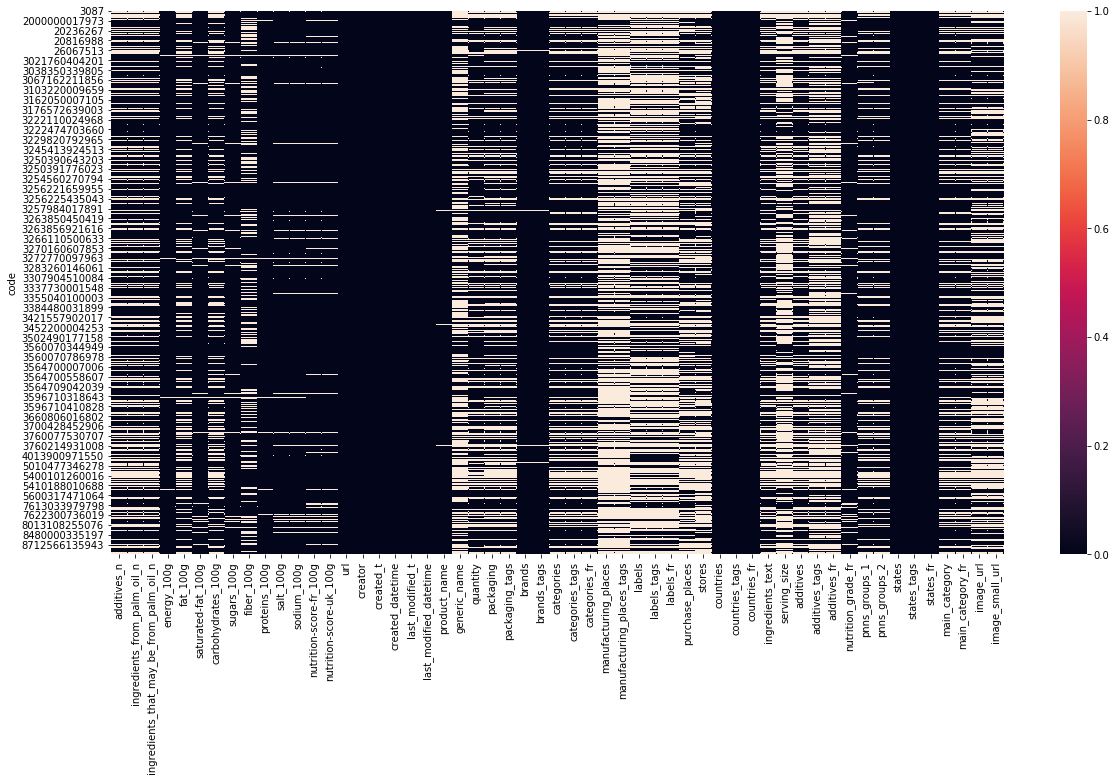

In [59]:
# Revisualisation de la dispersion des NaN dans le jeu de données France
plt.figure(figsize=(20,10))
sns.heatmap(data_france.isna(), cbar=True)

In [60]:
data_count_percent_nan(data_France_objet,'data_france_objet')

count_data_france_objet  percent_data_france_objet
url                                              0                   0.000000
states                                           0                   0.000000
countries                                        0                   0.000000
states_fr                                        0                   0.000000
countries_fr                                     0                   0.000000
countries_tags                                   0                   0.000000
last_modified_t                                  0                   0.000000
created_datetime                                 0                   0.000000
created_t                                        0                   0.000000
creator                                          0                   0.000000
last_modified_datetime                           0                   0.000000
states_tags                                      0                   0.000000
product_name                                   311                   0.545509
brands                                         316                   0.554279
brands_tags                                    316                   0.554279
nutrition_grade_fr                            3255                   5.709424
pnns_groups_2                                12937                  22.692112
pnns_groups_1                                13049                  22.888565
quantity                                     14795                  25.951132
categories                                   15701                  27.540299
categories_fr                                15701                  27.540299
categories_tags                              15701                  27.540299
main_category_fr                             15701                  27.540299
main_category                                15701                  27.540299
packaging_tags                               18073                  31.700900
packaging                                    18073                  31.700900
ingredients_text                             19291                  33.837330
additives                                    19300                  33.853116
image_small_url                              25417                  44.582624
image_url                                    25417                  44.582624
purchase_places                              26573                  46.610303
generic_name                                 29636                  51.982951
stores                                       29825                  52.314466
labels_tags                                  31703                  55.608567
labels_fr                                    31703                  55.608567
labels                                       31730                  55.655926
additives_tags                               33082                  58.027398
additives_fr                                 33082                  58.027398
serving_size                                 35395                  62.084510
manufacturing_places                         38894                  68.221922
manufacturing_places_tags                    38895                  68.223676

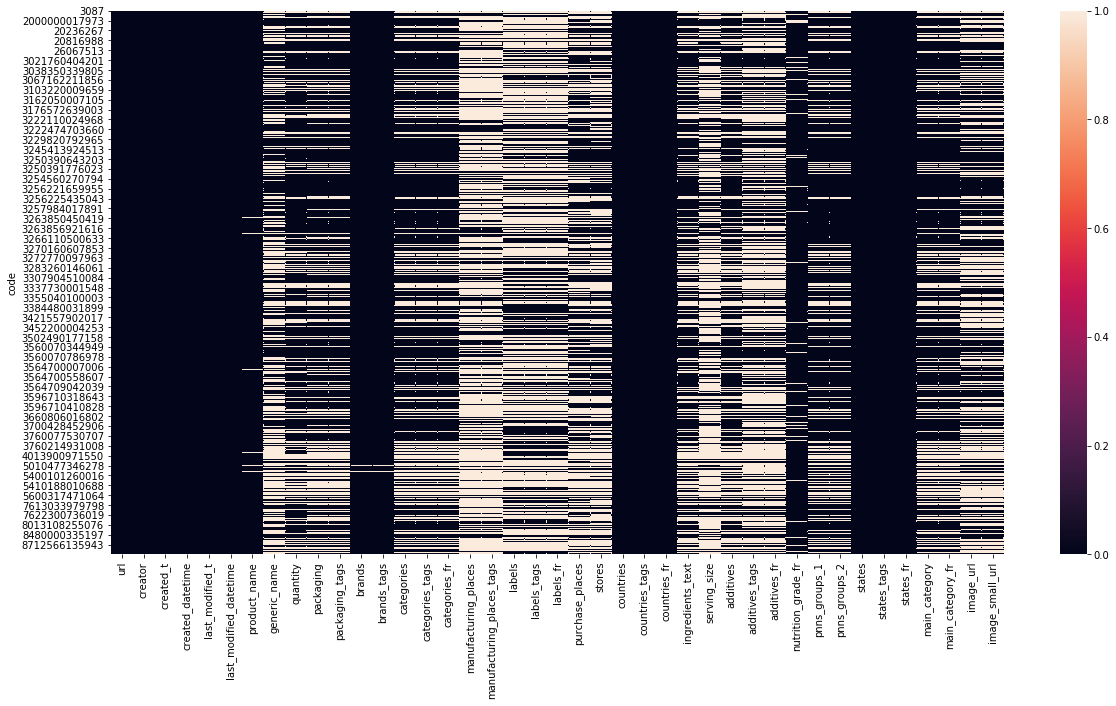

In [61]:
# Revisualisation de la dispersion des NaN dans le jeu de données France
plt.figure(figsize=(20,10))
sns.heatmap(data_France_objet.isna(), cbar=True)

In [67]:
data_count_percent_nan(data_France_float,'data_france_float')

count_data_france_float  \
energy_100g                                                  394   
proteins_100g                                                640   
salt_100g                                                   2187   
sodium_100g                                                 2190   
sugars_100g                                                 2261   
saturated-fat_100g                                          2340   
nutrition-score-fr_100g                                     3255   
nutrition-score-uk_100g                                     3255   
fiber_100g                                                 16334   
fat_100g                                                   16532   
carbohydrates_100g                                         16677   
additives_n                                                19291   
ingredients_from_palm_oil_n                                19291   
ingredients_that_may_be_from_palm_oil_n                    19291   

                                         percent_data_france_float  
energy_100g                                               0.691095  
proteins_100g                                             1.122590  
salt_100g                                                 3.836102  
sodium_100g                                               3.841364  
sugars_100g                                               3.965901  
saturated-fat_100g                                        4.104471  
nutrition-score-fr_100g                                   5.709424  
nutrition-score-uk_100g                                   5.709424  
fiber_100g                                               28.650611  
fat_100g                                                 28.997913  
carbohydrates_100g                                       29.252250  
additives_n                                              33.837330  
ingredients_from_palm_oil_n                              33.837330  
ingredients_that_may_be_from_palm_oil_n                  33.837330

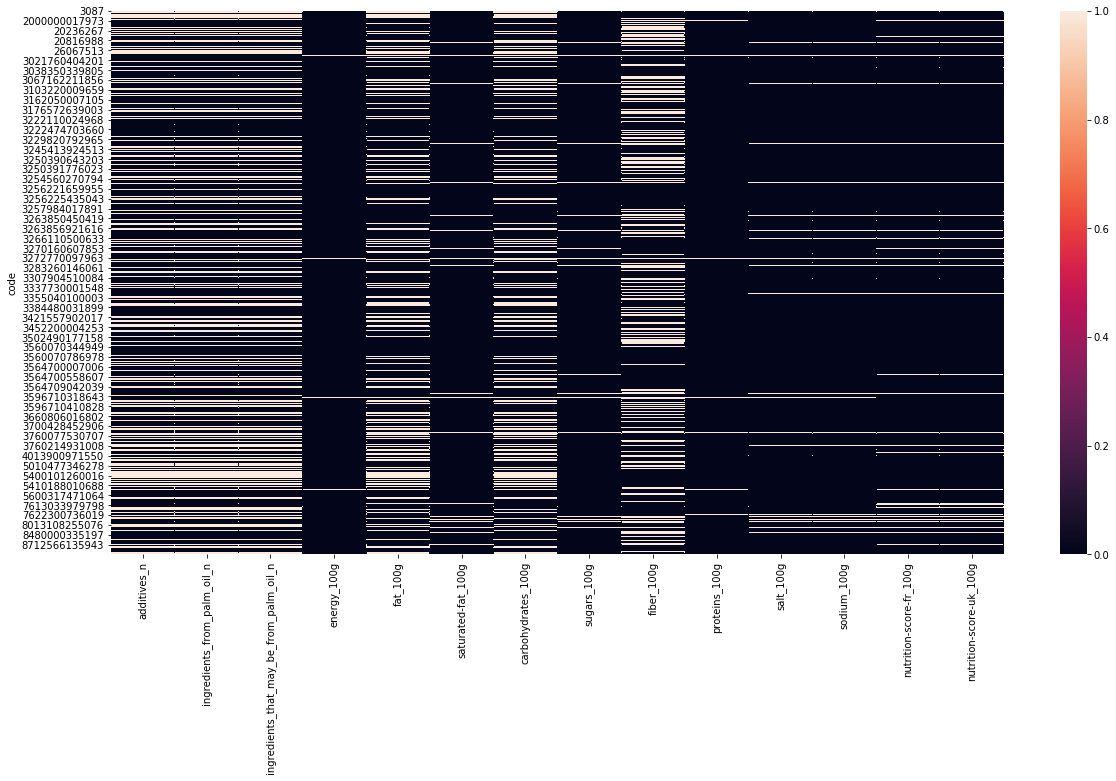

In [63]:
# Revisualisation de la dispersion des NaN dans le jeu de données France
plt.figure(figsize=(20,10))
sns.heatmap(data_France_float.isna(), cbar=True)

### 2. Selection des  variables utiles pour mon application 

In [34]:
data_France_objet.columns

Index(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'generic_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'purchase_places', 'stores', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives',
       'additives_tags', 'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url'],
      dtype='object')

In [35]:
data_France_float.columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [36]:
data_France_float[['ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n']]

ingredients_that_may_be_from_palm_oil_n  \
code                                                     
3087                                               NaN   
5200016                                            0.0   
7730009                                            1.0   
10127735                                           0.0   
10187319                                           NaN   
...                                                ...   
96103890                                           NaN   
9782211109758                                      NaN   
9782401029101                                      NaN   
9847548283004                                      NaN   
9900000000233                                      NaN   

               ingredients_from_palm_oil_n  
code                                        
3087                                   NaN  
5200016                                0.0  
7730009                                0.0  
10127735                               0.0  
10187319                               NaN  
...                                    ...  
96103890                               NaN  
9782211109758                          NaN  
9782401029101                          NaN  
9847548283004                          NaN  
9900000000233                          NaN  

[57011 rows x 2 columns]

In [68]:
data_France_float[['ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n']].describe()

ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n
count                             37720.000000                 37720.000000
mean                                  0.176246                     0.081416
std                                   0.490594                     0.277900
min                                   0.000000                     0.000000
25%                                   0.000000                     0.000000
50%                                   0.000000                     0.000000
75%                                   0.000000                     0.000000
max                                   5.000000                     2.000000

nutrition_grade_fr : grade nutritionnel ('a' à 'e'). voir https://fr.openfoodfacts.org/nutriscore
nutrition-score-fr_100g : Nutri-Score - Score nutritionnel dérivé du score UK FSA et adapté pour le marché français (formule définie par l'équipe du Professeur Hercberg)                                                               
nutrition-score-uk_100g : score nutritionnel défini par la Food Standards Administration
(FSA) du Royaume-Uni FSA : Administration des normes alimentaires britanique

Nous séléctionnons les variables qui nous semblent pertienentes pour notre étude :                        
    Variables nutritionnelles (numériques) : 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g','salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'.                              
    Variables catégorielles : 'pnns_groups_1','product_name', 'brands', 
                              'countries_fr','ingredients_text''labels_fr','nutrition_grade_fr'.?'serving_size'                           
    Variable temporelle : 'last_modified_datetime'.                                          
    et la variable 'code' qui nous servira comme identifiant pour nos produits.

Je stocke mes variables nutritionnelles dans nutriments_labels et mes variables catégorilles dans gategoriels_labels

In [37]:
nutriments_labels = ['saturated-fat_100g',
                     'energy_100g',
                     'fat_100g',
                     'carbohydrates_100g',
                     'sugars_100g',
                     'fiber_100g',
                     'proteins_100g',
                     'salt_100g',
                     'sodium_100g',
                     'nutrition-score-fr_100g']

Et mes variables catégorielles dans gategoriels_labels

In [38]:
gategoriels_labels = ['pnns_groups_1',
                      'product_name',
                      'brands', 
                      'countries_fr',
                      'ingredients_text', 
                      'serving_size',
                      'nutrition_grade_fr']

On construit un nouveau DataFrame France avec les variables séléctionnées

In [39]:
data_fr = data_france.loc[:, nutriments_labels + gategoriels_labels]

In [40]:
data_fr

saturated-fat_100g  energy_100g  fat_100g  carbohydrates_100g  \
code                                                                           
3087                          NaN          NaN       NaN                 NaN   
5200016                       NaN          NaN       NaN                 NaN   
7730009                       NaN          NaN       NaN                 NaN   
10127735                      NaN          NaN       NaN                 NaN   
10187319                     0.80       1753.0       NaN                 NaN   
...                           ...          ...       ...                 ...   
96103890                    10.00       1996.0       NaN                 NaN   
9782211109758               12.00       1084.0       NaN                 NaN   
9782401029101                1.00          4.0       NaN                 NaN   
9847548283004                0.60       1643.0       2.8                74.8   
9900000000233                3.73       2406.0       NaN                 NaN   

               sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                                            
3087                   NaN         NaN            NaN        NaN          NaN   
5200016                NaN         NaN            NaN        NaN          NaN   
7730009                NaN         NaN            NaN        NaN          NaN   
10127735               NaN         NaN            NaN        NaN          NaN   
10187319             87.70         0.9           0.60       0.01     0.003937   
...                    ...         ...            ...        ...          ...   
96103890             22.00         6.0          22.00       1.00     0.393701   
9782211109758        10.50         0.0           8.70       0.29     0.114173   
9782401029101         1.00        10.0          10.00      10.00     3.937008   
9847548283004         2.60         5.9          13.00       0.68     0.267717   
9900000000233         3.89        12.2          21.22       0.10     0.039370   

               nutrition-score-fr_100g         pnns_groups_1  \
code                                                           
3087                               NaN                   NaN   
5200016                            NaN  Cereals and potatoes   
7730009                            NaN         Sugary snacks   
10127735                           NaN               unknown   
10187319                          14.0                   NaN   
...                                ...                   ...   
96103890                          17.0                   NaN   
9782211109758                     16.0                   NaN   
9782401029101                      0.0                   NaN   
9847548283004                     -4.0  Cereals and potatoes   
9900000000233                      0.0                   NaN   

                                      product_name              brands  \
code                                                                     
3087                            Farine de blé noir     Ferme t'y R'nao   
5200016                          lentilles vertes     Bertrand Lejeune   
7730009          Biscuits sablés fourrage au cacao           St Michel   
10127735              Sirops pour ganache macarons        Alice Délice   
10187319                            Mini Confettis        Alice Délice   
...                                            ...                 ...   
96103890                Eat Natural Protein Packed              Biobio   
9782211109758           Verrine Cheescake Myrtille              Kayser   
9782401029101                         Fiche Brevet              Hatier   
9847548283004  Tartines craquantes bio au sarrasin  Le Pain des fleurs   
9900000000233                              Amandes              Biosic   

              countries_fr                                   ingredients_text  \
code                                       

In [77]:
data_fr.describe()

saturated-fat_100g   energy_100g      fat_100g  carbohydrates_100g  \
count        54671.000000  5.661700e+04  40479.000000        40334.000000   
mean             5.363183  1.169832e+03     12.997564           27.587359   
std              8.399050  1.370632e+04     16.195728           27.080469   
min              0.000000  0.000000e+00      0.000000            0.000000   
25%              0.300000  4.310000e+02      1.300000            4.400000   
50%              2.000000  1.025000e+03      6.900000           14.900000   
75%              7.300000  1.640000e+03     20.600000           52.600000   
max            210.000000  3.251373e+06    380.000000          190.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  54750.000000  40677.000000   56371.000000  54824.000000  54821.000000   
mean      13.448129      2.555719       7.745636      1.169663      0.460520   
std       18.935761      4.706529       7.890451      4.210033      1.657469   
min       -0.100000      0.000000       0.000000      0.000000      0.000000   
25%        1.030000      0.000000       1.900000      0.089916      0.035400   
50%        4.200000      1.300000       6.000000      0.590000      0.232283   
75%       18.000000      3.200000      10.700000      1.250000      0.492126   
max      105.000000    178.000000     100.000000    211.000000     83.000000   

       nutrition-score-fr_100g  ingredients_from_palm_oil_n  \
count             53756.000000                 37720.000000   
mean                  8.718115                     0.081416   
std                   8.991044                     0.277900   
min                 -15.000000                     0.000000   
25%                   1.000000                     0.000000   
50%                   9.000000                     0.000000   
75%                  15.000000                     0.000000   
max                  40.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n  
count                             37720.000000  
mean                                  0.176246  
std                                   0.490594  
min                                   0.000000  
25%                                   0.000000  
50%                                   0.000000  
75%                                   0.000000  
max                                   5.000000

In [78]:
data_fr.index.isna().sum()

0

In [41]:
data_fr.to_csv( 'data/data_fr.csv')

In [42]:
data_fr = pd.read_csv('data/data_fr.csv' , sep=',', on_bad_lines='skip', low_memory=False, index_col='code')

In [43]:
data_objet, data_float = df_object_float(data_fr)

In [44]:
data_count_percent(data_objet, data_objet.columns).sort_values(by='percent', ascending=True)

count    percent
countries_fr            0   0.000000
product_name          311   0.545509
brands                316   0.554279
nutrition_grade_fr   3255   5.709424
pnns_groups_1       13049  22.888565
ingredients_text    19291  33.837330
serving_size        35395  62.084510

On remarque que la variable 'serving_size'  contient plus de 62% de NaN. On la supprime

In [45]:
data_fr.drop('serving_size', axis=1, inplace=True)

In [46]:
data_count_percent(data_float, data_float.columns).sort_values(by='percent', ascending=True)

count    percent
energy_100g                394   0.691095
proteins_100g              640   1.122590
salt_100g                 2187   3.836102
sodium_100g               2190   3.841364
sugars_100g               2261   3.965901
saturated-fat_100g        2340   4.104471
nutrition-score-fr_100g   3255   5.709424
fiber_100g               16334  28.650611
fat_100g                 16532  28.997913
carbohydrates_100g       16677  29.252250

######  Corrélation

In [47]:
data_France_corr = data_float.corr()
data_France_corr

saturated-fat_100g  energy_100g  fat_100g  \
saturated-fat_100g                 1.000000     0.028664  0.747974   
energy_100g                        0.028664     1.000000  0.032768   
fat_100g                           0.747974     0.032768  1.000000   
carbohydrates_100g                -0.008650     0.028636 -0.054257   
sugars_100g                        0.080142     0.015690  0.002952   
fiber_100g                         0.020195     0.023216  0.079541   
proteins_100g                      0.150244     0.019655  0.166119   
salt_100g                          0.013009    -0.002038  0.017063   
sodium_100g                        0.013006    -0.002038  0.017059   
nutrition-score-fr_100g            0.597379     0.030552  0.581734   

                         carbohydrates_100g  sugars_100g  fiber_100g  \
saturated-fat_100g                -0.008650     0.080142    0.020195   
energy_100g                        0.028636     0.015690    0.023216   
fat_100g                          -0.054257     0.002952    0.079541   
carbohydrates_100g                 1.000000     0.649860    0.238270   
sugars_100g                        0.649860     1.000000    0.033421   
fiber_100g                         0.238270     0.033421    1.000000   
proteins_100g                     -0.140637    -0.246946    0.193848   
salt_100g                         -0.075163    -0.086454    0.008663   
sodium_100g                       -0.075159    -0.086462    0.008668   
nutrition-score-fr_100g            0.269565     0.449926   -0.127963   

                         proteins_100g  salt_100g  sodium_100g  \
saturated-fat_100g            0.150244   0.013009     0.013006   
energy_100g                   0.019655  -0.002038    -0.002038   
fat_100g                      0.166119   0.017063     0.017059   
carbohydrates_100g           -0.140637  -0.075163    -0.075159   
sugars_100g                  -0.246946  -0.086454    -0.086462   
fiber_100g                    0.193848   0.008663     0.008668   
proteins_100g                 1.000000   0.099996     0.100005   
salt_100g                     0.099996   1.000000     1.000000   
sodium_100g                   0.100005   1.000000     1.000000   
nutrition-score-fr_100g       0.103768   0.124510     0.124516   

                         nutrition-score-fr_100g  
saturated-fat_100g                      0.597379  
energy_100g                             0.030552  
fat_100g                                0.581734  
carbohydrates_100g                      0.269565  
sugars_100g                             0.449926  
fiber_100g                             -0.127963  
proteins_100g                           0.103768  
salt_100g                               0.124510  
sodium_100g                             0.124516  
nutrition-score-fr_100g                 1.000000

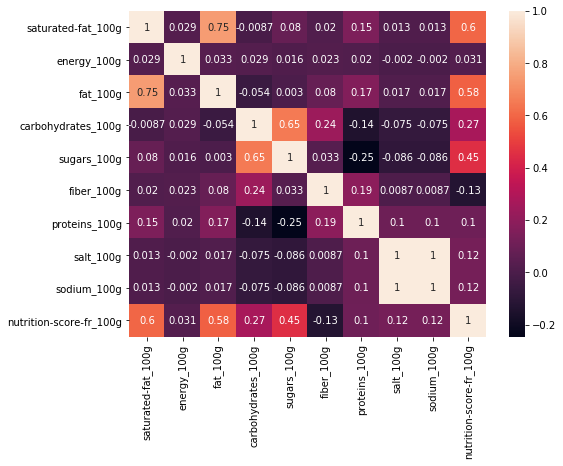

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_France_corr, annot=True)
plt.show()

On remarque qu'il y'a corrélation total entre les variables 'salt_100g' et 'sodium_100g', on remarque une correlation entre 'saturated-fat_100g', 'fat_100g' et 'nutrition-score-fr_100g' et peut de corrélation entre d'autres variables (<0.0...)

### Les Histogrammes des pourcentages des NaN avant traitement des outliers

Pour cela dans un premier , je calcule le nombre de NaN et leur pourcentage, ensuite je trace leur repartition sous forme d'histogramme.

In [78]:
data_nan(data_fr)

Nbre de valeurs manquantes Valeurs manquantes en %
Données Food Facts                      99032                    0.10

Il ne reste que 10% de Valeurs manquantes dans le nouveau jeu de données

In [49]:
data_fr_NAN = data_count_percent(data_fr, data_fr.columns)

In [50]:
#data_fr_NAN.transpose()
fig = px.bar(data_fr_NAN, y='percent', text_auto='.2s',color='count',
            title='Le pourcentage des NaN pour chaque variable avant traitement')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [51]:
data_float_NAN = data_count_percent(data_float, data_float.columns)

In [52]:
#data_float_NAN.transpose()
fig = px.bar(data_float_NAN, y='percent', text_auto='.2s',color='count',
            title='Le pourcentage des NaN pour chaque variable de type numérique avant traitement')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [53]:
data_objet_NAN = data_count_percent(data_objet, data_objet.columns)

In [54]:
#data_objet_NAN.transpose()
fig = px.bar(data_objet_NAN, y='percent', text_auto='.2s',color='count',
            title='Le pourcentage des NaN pour chaque variable de type objet avant traitement')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

On observe certaines variables catégorielles qui n'ont aucune valeur NaN : les variables 'code', 'last_modified_datetime', 'countries_fr' et des variables numériques qui ont des NaN qui dépassent 50%           D'autres commentaires : ....                                                                                          

### 2 : Détection et remplacement  des valeurs abérrantes par des NaN
#### Dans cette partie, j'utilise deux methodes: une méthode métier et une méthode basé sur les interquantile                                    
##### ensuite je compare les deux methodes.

In [55]:
data_fr.shape

(57011, 16)

In [61]:
data_fr.duplicated().sum()

0

In [62]:
data = data_fr.copy()

In [63]:
data.shape

(57011, 16)

In [64]:
data.duplicated().sum()

0

In [68]:
data_objet, data_float = df_object_float(data)

In [69]:
formats(data_objet, 'data france objets')

Nbre de lignes  Nbre de colonnes
data france objets           57011                 6

In [70]:
formats(data_float, 'data france floats')

Nbre de lignes  Nbre de colonnes
data france floats           57011                10

Nous avons 7 variables de type objet et 10 variables de types float

### 2-1 : Méthode métier

###### 2-1.1 : Détection des valeurs aberrantes(outliers)

In [71]:
#Nbre de valeurs abérantes par variable
nombre_valeur_aberrantes = detect_outliers(data_float, data_float.columns)

In [72]:
nombre_valeur_aberrantes.sort_values()

proteins_100g                 0
sodium_100g                   0
saturated-fat_100g            1
fiber_100g                    1
fat_100g                      2
salt_100g                     2
sugars_100g                   5
carbohydrates_100g            8
energy_100g                 206
nutrition-score-fr_100g    8911
dtype: int64

In [73]:
# Valeurs aberrantes detectées en pourcentage
data_per_outlier = (nombre_valeur_aberrantes*100/data_float.shape[0]).sort_values()
data_per_outlier

proteins_100g               0.000000
sodium_100g                 0.000000
saturated-fat_100g          0.001754
fiber_100g                  0.001754
fat_100g                    0.003508
salt_100g                   0.003508
sugars_100g                 0.008770
carbohydrates_100g          0.014032
energy_100g                 0.361334
nutrition-score-fr_100g    15.630317
dtype: float64

On observe que la variable 'nutrition-score-fr_100g' en contient 15.51% 

###### 2-1.2 : Remplacement des valeurs abérantes detectées par des NaN 

In [74]:
data_float_sans_outliers = replace_outliers_per_nan(data_float, data_float.columns)

In [75]:
detect_outliers(data_float_sans_outliers, data_float_sans_outliers.columns)

saturated-fat_100g         0
fat_100g                   0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
energy_100g                0
dtype: int64

On remarque que tous les outliers ont été remplacés par des NaN

In [76]:
data_nutriment_NAN = data_count_percent(data_float_sans_outliers, data_float_sans_outliers.columns)
data_nutriment_NAN

count    percent
energy_100g               9518  16.695024
proteins_100g             9760  17.119503
salt_100g                11303  19.825998
sodium_100g              11306  19.831261
sugars_100g              11379  19.959306
saturated-fat_100g       11461  20.103138
nutrition-score-fr_100g  12371  21.699321
fat_100g                 23240  40.764063
carbohydrates_100g       23395  41.035940
fiber_100g               24609  43.165354

In [77]:
#data_nutriment_NAN.transpose()
fig = px.bar(data_nutriment_NAN, y='percent', text_auto='.2s',color='count',
            title='Le pourcentage des NaN pour pour chaque variable nutritionelle')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

On remarque que le nombre des NaN a augmenté pour toutes les variables nutritionnelles aprés traitement des outliers

### 2-2 :  Méthode interquartile

###### 2-2.1 : Détection des valeurs aberrantes(outliers)

In [78]:
#Nbre de valeurs abérantes par variable
nombre_valeur_aberrantes_interquartile = detect_outliers_interq(data_float, data_float.columns)
nombre_valeur_aberrantes_interquartile.sort_values()

nutrition-score-fr_100g        1
sodium_100g                   32
fiber_100g                    57
salt_100g                    180
proteins_100g                224
saturated-fat_100g           495
fat_100g                    2700
sugars_100g                 6910
carbohydrates_100g         12041
energy_100g                46857
dtype: int64

In [79]:
#Nbre d'outliers détéctés en pourcentage
(nombre_valeur_aberrantes_interquartile*100/data_float.shape[0]).sort_values()

nutrition-score-fr_100g     0.001754
sodium_100g                 0.056130
fiber_100g                  0.099981
salt_100g                   0.315729
proteins_100g               0.392907
saturated-fat_100g          0.868253
fat_100g                    4.735928
sugars_100g                12.120468
carbohydrates_100g         21.120486
energy_100g                82.189402
dtype: float64

On obsrve qu'il y'a beaucoup de valeurs abérantes détéctées par rapport à la méthode métier

###### 2-2.2 :  Remplacement des valeurs abérantes par des NaN 

In [80]:
data_sans_outlier_interquartile = replace_outliers_per_na_quartile(data_float, data_float.columns)

In [81]:
data_per_NaN_interquartile = data_count_percent(data_sans_outlier_interquartile, data_float.columns).sort_values(by='percent', ascending=True)
data_per_NaN_interquartile

count    percent
energy_100g              20379  35.745733
proteins_100g            20587  36.110575
salt_100g                21953  38.506604
sodium_100g              21956  38.511866
sugars_100g              22023  38.629387
saturated-fat_100g       22119  38.797776
nutrition-score-fr_100g  22680  39.781796
fat_100g                 30348  53.231832
carbohydrates_100g       30442  53.396713
fiber_100g               32318  56.687306

In [82]:
#data_per_NaN_interquartile.transpose()
fig = px.bar(data_per_NaN_interquartile, y='percent', text_auto='.2s',color='count',
            title='Le pourcentage des NaN pour chaque variable nutritionnelle aprés traitement')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

On peut conclure que la methode interquartile detecte des données qui ne sont peut être pas des outliers. Du coup la methode metier est plus pertinente et je continuerai mes analyse avec les données traitées par la metier metier

In [83]:
#data_France_metier = pd.concat([data_objet, data_outlier_per_nan], axis=1)

In [84]:
#data_France_metier

### 3 : Traitement des valeurs manquantes : les NaN
###### À cet effet, j'utilise plusieurs méthodes : 
- IterateImputer
- Remplacement des NaN par 0
- Imputation par KNN
- Suppression des NaN pour les variables catégorielles

###### 3.1 : IterateImputer  https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

La methode IterateImputer se base sur les variables correlées entre elles, raison pour laquelle je calucle le coefficient de correlation entre les variables.

In [85]:
data_float_sans_outliers

saturated-fat_100g  energy_100g  fat_100g  carbohydrates_100g  \
code                                                                           
3087                          NaN          NaN       NaN                 NaN   
5200016                       NaN          NaN       NaN                 NaN   
7730009                       NaN          NaN       NaN                 NaN   
10127735                      NaN          NaN       NaN                 NaN   
10187319                      NaN          NaN       NaN                 NaN   
...                           ...          ...       ...                 ...   
96103890                     10.0       1996.0       NaN                 NaN   
9782211109758                12.0       1084.0       NaN                 NaN   
9782401029101                 NaN          NaN       NaN                 NaN   
9847548283004                 NaN          NaN       NaN                 NaN   
9900000000233                 NaN          NaN       NaN                 NaN   

               sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
code                                                                            
3087                   NaN         NaN            NaN        NaN          NaN   
5200016                NaN         NaN            NaN        NaN          NaN   
7730009                NaN         NaN            NaN        NaN          NaN   
10127735               NaN         NaN            NaN        NaN          NaN   
10187319               NaN         NaN            NaN        NaN          NaN   
...                    ...         ...            ...        ...          ...   
96103890              22.0         6.0           22.0       1.00     0.393701   
9782211109758         10.5         0.0            8.7       0.29     0.114173   
9782401029101          NaN         NaN            NaN        NaN          NaN   
9847548283004          NaN         NaN            NaN        NaN          NaN   
9900000000233          NaN         NaN            NaN        NaN          NaN   

               nutrition-score-fr_100g  
code                                    
3087                               NaN  
5200016                            NaN  
7730009                            NaN  
10127735                           NaN  
10187319                           NaN  
...                                ...  
96103890                          17.0  
9782211109758                     16.0  
9782401029101                      NaN  
9847548283004                      NaN  
9900000000233                      NaN  

[57011 rows x 10 columns]

In [86]:
data_float_sans_outliers.dtypes

saturated-fat_100g         float64
energy_100g                float64
fat_100g                   float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
dtype: object

In [87]:
data_float = data_float_sans_outliers.copy()

In [88]:
data_corr = data_float.corr()
data_corr

saturated-fat_100g  energy_100g  fat_100g  \
saturated-fat_100g                 1.000000     0.603846  0.766759   
energy_100g                        0.603846     1.000000  0.783752   
fat_100g                           0.766759     0.783752  1.000000   
carbohydrates_100g                 0.187197     0.728251  0.199288   
sugars_100g                        0.278828     0.471579  0.208495   
fiber_100g                         0.111231     0.467842  0.343155   
proteins_100g                      0.287364     0.267649  0.309260   
salt_100g                          0.090699     0.160627  0.264088   
sodium_100g                        0.090677     0.160655  0.264062   
nutrition-score-fr_100g            0.741337     0.712471  0.687531   

                         carbohydrates_100g  sugars_100g  fiber_100g  \
saturated-fat_100g                 0.187197     0.278828    0.111231   
energy_100g                        0.728251     0.471579    0.467842   
fat_100g                           0.199288     0.208495    0.343155   
carbohydrates_100g                 1.000000     0.645515    0.578593   
sugars_100g                        0.645515     1.000000    0.237795   
fiber_100g                         0.578593     0.237795    1.000000   
proteins_100g                     -0.119005    -0.223054    0.088404   
salt_100g                         -0.143008    -0.389428    0.112333   
sodium_100g                       -0.142944    -0.389461    0.112472   
nutrition-score-fr_100g            0.428863     0.532851    0.099354   

                         proteins_100g  salt_100g  sodium_100g  \
saturated-fat_100g            0.287364   0.090699     0.090677   
energy_100g                   0.267649   0.160627     0.160655   
fat_100g                      0.309260   0.264088     0.264062   
carbohydrates_100g           -0.119005  -0.143008    -0.142944   
sugars_100g                  -0.223054  -0.389428    -0.389461   
fiber_100g                    0.088404   0.112333     0.112472   
proteins_100g                 1.000000   0.550131     0.550182   
salt_100g                     0.550131   1.000000     1.000000   
sodium_100g                   0.550182   1.000000     1.000000   
nutrition-score-fr_100g       0.164160   0.193306     0.193306   

                         nutrition-score-fr_100g  
saturated-fat_100g                      0.741337  
energy_100g                             0.712471  
fat_100g                                0.687531  
carbohydrates_100g                      0.428863  
sugars_100g                             0.532851  
fiber_100g                              0.099354  
proteins_100g                           0.164160  
salt_100g                               0.193306  
sodium_100g                             0.193306  
nutrition-score-fr_100g                 1.000000

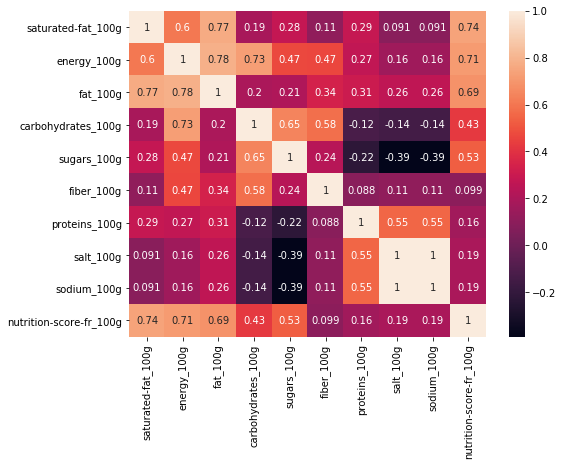

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_corr, annot=True)
plt.show()

###### Variables corrélées à plus de 70%
saturated-fat_100g   : fat_100g, nutrition-score-fr_100g
energy_100g          : fat_100g, carbohydrates_100g, nutrition-score-fr_100g
fat_100g             : saturated-fat_100g, energy_100g, 
carbohydrates_100g   : energy_100g 
sugars_100g          : 0
fiber_100g           : 0
proteins_100g        : 0
salt_100g            : sodium_100g
sodium_100g          : salt_100g
nutrition-score-fr_100g  : saturated-fat_100g, energy_100g

- les variables 'sodium_100g' et 'salt_100g' sont corrélées à 100%
- La variables 'energy_100g' est fortement correlée(>57%) avec:'saturated-fat_100g','fat_100g', et 'nutrition-score-fr_100g'                                                                                    
- les variables 'carbohydrates_100g' et 'sugars_100g' sont corrélées à 0.72%                                                                            
- Les variable 'proteins_100g' et 'fiber_100g' ne sont corrélées à aucune autre variable

In [90]:
columns_corr_1 = ['sodium_100g','salt_100g']
columns_corr_2 = ['energy_100g', 'fat_100g','nutrition-score-fr_100g']
columns_corr_3 = ['carbohydrates_100g','energy_100g']
columns_corr_4 = ['saturated-fat_100g','fat_100g']

In [91]:
imputerimputer = IterativeImputer()

In [92]:
data_float[columns_corr_1] = imputerimputer.fit_transform(data_float[columns_corr_1])

In [93]:
data_float[columns_corr_2] = imputerimputer.fit_transform(data_float[columns_corr_2])

In [94]:
data_float[columns_corr_3] = imputerimputer.fit_transform(data_float[columns_corr_3])

In [95]:
data_float[columns_corr_4] = imputerimputer.fit_transform(data_float[columns_corr_4])

In [96]:
data_per_NaN = data_count_percent(data_float, data_float.columns).sort_values(by='percent', ascending=True)
data_per_NaN

count    percent
saturated-fat_100g           0   0.000000
energy_100g                  0   0.000000
fat_100g                     0   0.000000
carbohydrates_100g           0   0.000000
salt_100g                    0   0.000000
sodium_100g                  0   0.000000
nutrition-score-fr_100g      0   0.000000
proteins_100g            20587  36.110575
sugars_100g              22023  38.629387
fiber_100g               32318  56.687306

In [97]:
data_per_NaN.transpose()
fig = px.bar(data_per_NaN, y='percent', text_auto='.2s',color='count',
            title='Pourcentage des NaN après filtrage imputerimputer')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Après l'application de iterateImputer sur les variables corrélées, on observe qu'elles n'ont plus NaN, par contre les variables non corrélées avec les autres possedent encore beacoup de NaN

###### 3.2 :  Remplacement des NaN par 0 des variables:

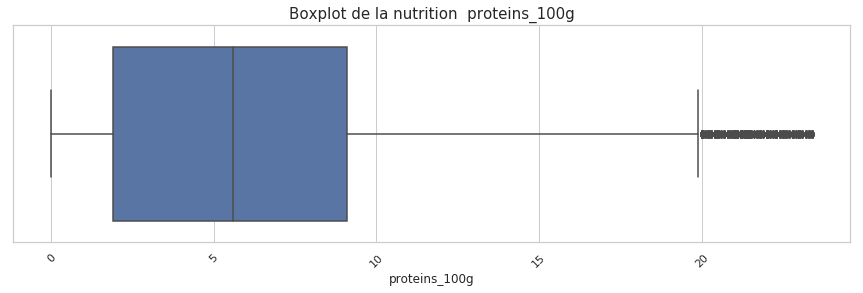

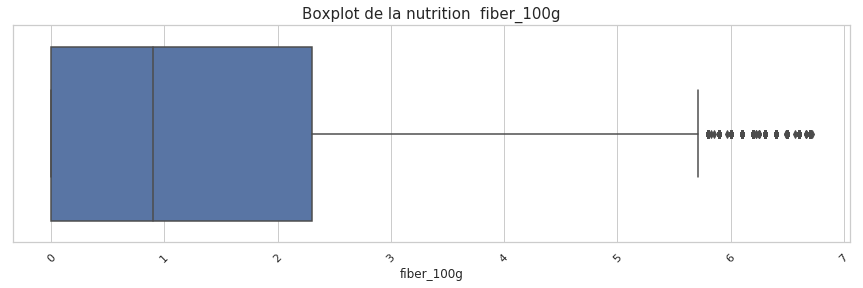

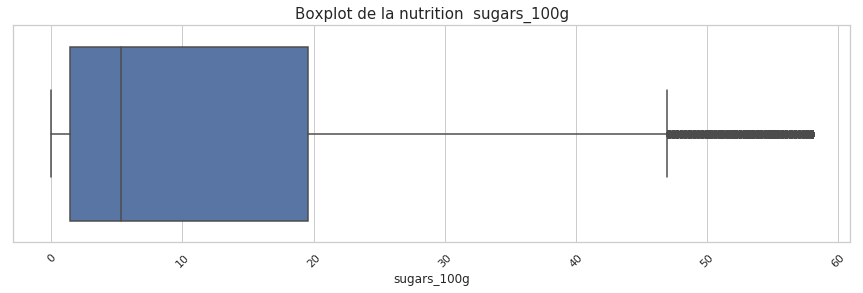

In [98]:
sns.set(font_scale=2)
for column in ['proteins_100g','fiber_100g','sugars_100g']:
   
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 4))
    plt.xticks(rotation=45)
    plt.title('Boxplot de la nutrition  ' + column , size=15)
    sns.boxplot(x = column, data = data_float)
    #chaine = 'Analyse Univarié de: ' + column + ' par categories de produit '
    plt.show()
sns.set(font_scale=1)

- Pour la variable 'proteins_100g', on remplace ses NaN par la valeur de la médiane.       
- Pour la variable 'fiber_100g', on utilisera la méthode des KNN

In [99]:
median_proteins_100g = data_float['proteins_100g'].median()

In [100]:
median_fiber_100g = data_float['fiber_100g'].median()

In [101]:
print(median_proteins_100g,median_fiber_100g)

5.6 0.9


In [102]:
data_float['proteins_100g'].fillna(median_proteins_100g, inplace=True)

In [103]:
data_float['fiber_100g'].fillna(median_fiber_100g, inplace=True)

In [104]:
nutritives_par_zero = ['sugars_100g']

In [105]:
data_float[nutritives_par_zero] = data[nutritives_par_zero].fillna(0)

In [106]:
NaN_per_mediane= data_count_percent(data_float, data_float.columns).sort_values(by='percent', ascending=True)
NaN_per_mediane

count  percent
saturated-fat_100g           0      0.0
energy_100g                  0      0.0
fat_100g                     0      0.0
carbohydrates_100g           0      0.0
sugars_100g                  0      0.0
fiber_100g                   0      0.0
proteins_100g                0      0.0
salt_100g                    0      0.0
sodium_100g                  0      0.0
nutrition-score-fr_100g      0      0.0

In [107]:
#NaN_per_zero.transpose()
fig = px.bar(NaN_per_mediane, y='percent', text_auto='.2s',color='count',
            title='Pourcentage des NaN après remplacement par 0')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [108]:
data_objet.columns

Index(['pnns_groups_1', 'product_name', 'brands', 'countries_fr',
       'ingredients_text', 'nutrition_grade_fr'],
      dtype='object')

In [109]:
data_objet.dropna(subset= data_objet.columns, inplace=True)

In [110]:
NaN_per_objet= data_count_percent(data_objet, data_objet.columns).sort_values(by='percent', ascending=True)
NaN_per_objet

count  percent
pnns_groups_1           0      0.0
product_name            0      0.0
brands                  0      0.0
countries_fr            0      0.0
ingredients_text        0      0.0
nutrition_grade_fr      0      0.0

In [111]:
#NaN_per_zero.transpose()
fig = px.bar(NaN_per_objet, y='percent', text_auto='.2s',color='count',
            title='Pourcentage des NaN après remplacement par 0')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [112]:
data_objet.shape

(34671, 6)

In [113]:
data_float.shape

(57011, 10)

In [114]:
data_clean = data_float.join(data_objet, on='code', how='right')

In [115]:
data_clean.sort_values(by='code')

saturated-fat_100g  energy_100g  fat_100g  \
code                                                         
10                              2.5       1900.0      23.0   
30                              2.5       1768.0      19.0   
31                              2.0       1670.0      15.0   
50                             10.0       1868.0      23.0   
51                             10.0       1896.0      24.0   
...                             ...          ...       ...   
356470049818702                16.3       2284.0      34.4   
356470058088201                10.3       1863.0      17.3   
356470079377001                 2.4       1745.0      19.0   
356470087056301                 2.0       1870.0      15.0   
366111205177802                 9.5       1220.0      24.0   

                 carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  \
code                                                                          
10                             55.0         26.0         1.5            6.0   
30                             56.0         28.0         1.8            5.8   
31                             60.0         34.0         1.5            4.9   
50                             51.0         39.0         1.7            8.0   
51                             50.0         37.0         2.5            8.1   
...                             ...          ...         ...            ...   
356470049818702                51.7         49.2         5.0            5.4   
356470058088201                68.7         55.6         1.8            3.1   
356470079377001                55.0         30.0         1.7            5.5   
356470087056301                70.0         35.0         3.6            6.3   
366111205177802                 3.4          1.9         0.9           15.9   

                 salt_100g  sodium_100g  nutrition-score-fr_100g  \
code                                                               
10                    0.66     0.259843                     12.0   
30                    0.65     0.255906                     13.0   
31                    0.60     0.236220                     12.0   
50                    0.55     0.216535                     22.0   
51                    0.78     0.307087                     22.0   
...                    ...          ...                      ...   
356470049818702       0.15     0.059055                     21.0   
356470058088201       0.42     0.165354                     24.0   
356470079377001       0.78     0.307087                     14.0   
356470087056301       0.75     0.295276                     11.0   
366111205177802       1.70     0.669291                     19.0   

                        pnns_groups_1  \
code                                    
10                      Sugary snacks   
30                      Sugary snacks   
31                      Sugary snacks   
50                      Sugary snacks   
51                      Sugary snacks   
...                               ...   
356470049818702               unknown   
356470058088201         Sugary snacks   
356470079377001         Sugary snacks   
356470087056301  Cereals and potatoes   
366111205177802        Fish Meat Eggs   

                                                     product_name  \
code                                                                
10                                              Madeleines nature   
30                                                  Cakes Raisins   
31                                               Cakes aux Fruits   
50                                         Financiers aux Amandes   
51                                                Fondants Citron   
...                                                           ...   
356470049818702                              Rochers noir praliné   
356470058088201                                 Caramels Chocolat   
356470079377001                         Barre Marbrée au Chocolat   
3564

In [116]:
formats(data_clean,'data_clean')

Nbre de lignes  Nbre de colonnes
data_clean           34671                16

In [117]:
data_nan= data_count_percent(data_clean, data_clean.columns).sort_values(by='percent', ascending=True)
data_nan

count  percent
saturated-fat_100g           0      0.0
energy_100g                  0      0.0
fat_100g                     0      0.0
carbohydrates_100g           0      0.0
sugars_100g                  0      0.0
fiber_100g                   0      0.0
proteins_100g                0      0.0
salt_100g                    0      0.0
sodium_100g                  0      0.0
nutrition-score-fr_100g      0      0.0
pnns_groups_1                0      0.0
product_name                 0      0.0
brands                       0      0.0
countries_fr                 0      0.0
ingredients_text             0      0.0
nutrition_grade_fr           0      0.0

In [118]:
#data_nan.transpose()
fig = px.bar(data_nan, y='percent', text_auto='.2s',color='count',
            title='Pourcentage des NaN après traitement des NaN')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Enregistrement du jeu de données bien nettoyé

In [119]:
data_clean.to_csv( 'data/fr.openfoodfacts.org.products_cleaned.csv', index=True)